In [1]:
import uproot
import pandas as pd
import mplhep as hep
import numpy as np
import awkward
import ROOT
import scipy.stats as stats #this one used to do fits
import matplotlib.pyplot as plt
import awkward as ak
import MyHelpers as mh
import StatisticTools as st
from tqdm import tqdm #this is a fancy feature to make a progress bar as the loop proceed


#to make the plots in CMS style execute this line
plt.style.use([hep.style.ROOT, hep.style.firamath])
plt.style.use(hep.style.CMS)

Welcome to JupyROOT 6.24/00


In [2]:
zpps = 2.34e4 #in cm
c = 29.9792#in cm/ns

def hist1D(x,bins,xlabel,labels,dir_name,scale):
    f, ax = plt.subplots()
    plt.hist(x,bins, histtype='step')
    if (scale == True): plt.yscale('log')
    hep.cms.label(llabel="Summer Student 2021 simulation", rlabel=" ",ax=ax, fontsize= 20)
    ax.set_xlabel(str(xlabel), fontsize = 17)
    ax.set_ylabel('number of entries', fontsize = 17)
    ax.legend(labels,loc='best',fontsize=17)
    plt.savefig(dir_name,bbox_inches='tight')

def double1D(x1,x2, bins1, bins2, xlabel1, xlabel2, labels1, labels2,dir_name):
    labels = [labels1,labels2]
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    ax[0].hist(x1, bins1)
    ax[0].legend(labels1,loc='best')    
    ax[0].set_xlabel(str(xlabel1), fontsize = 17)
    ax[0].set_ylabel('number of entries', fontsize = 17)
    ax[1].hist(x2, bins2)
    ax[1].legend(labels2,loc='best')
    ax[1].set_xlabel(str(xlabel2), fontsize = 17)
    ax[1].set_ylabel('number of entries', fontsize = 17)
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation",rlabel=" ", ax=ax[i], fontsize= 20)
        ax[i].legend(labels[i],loc = 'best',fontsize=17)
    plt.savefig(dir_name,bbox_inches='tight')
    
def doubleMTDfit(x1,x2, bins1, bins2, xlabel1, xlabel2, labels1, labels2,dir_name):
    labels = [labels1,labels2]
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    ax[0].hist(x1, bins1,label = labels1)
    ax[0].set_xlabel(str(xlabel1), fontsize = 17)
    ax[0].set_ylabel('number of entries', fontsize = 17)
    (mu, sigma) = stats.norm.fit(x1)
    y=stats.norm.pdf(bins1, mu, sigma)
    ax[0].plot(bins1, y, 'r--', linewidth=2,label='resolution = %2.2f ns'%sigma)    
    ax[1].hist(x2, bins2, label=labels2)
    ax[1].set_xlabel(str(xlabel2), fontsize = 17)
    ax[1].set_ylabel('number of entries', fontsize = 17)
    (mu, sigma) = stats.norm.fit(x2)
    y=stats.norm.pdf(bins2, mu, sigma)
    ax[1].plot(bins2, y, 'r--', linewidth=2,label='resolution = %2.2f ns'%sigma)
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="", ax=ax[i], fontsize= 20)
        ax[i].legend(loc='best',fontsize=17)
    plt.savefig(dir_name,bbox_inches='tight')
    
def double2D(x11,x12, x21, x22, bins1, bins2, xlabel1, ylabel1, xlabel2, ylabel2, dir_name):
    fig, axes = plt.subplots(1,2,figsize=(20,10) )
    h1 = axes[0].hist2d( x11, x12, bins1 , cmap='viridis')
    axes[0].set_xlabel(xlabel1, fontsize=17)
    axes[0].set_ylabel(ylabel1, fontsize=17)
    fig.colorbar(h1[3], ax=axes[0])
    h2 = axes[1].hist2d( x21, x22, bins2 , cmap='viridis')
    axes[1].set_xlabel(xlabel2, fontsize=17)
    axes[1].set_ylabel(ylabel2, fontsize=17)
    fig.colorbar(h2[3] , ax=axes[1])
    for i in range(2): hep.cms.label(llabel="Summer Student 2021 simulation", rlabel=" ",ax=axes[i], fontsize = 20)
    plt.savefig(dir_name,bbox_inches='tight')

def doubleFitMassY(x1,x2, bins1, bins2, xlabel1, xlabel2,dir_name):
    f, ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
    ax[0].hist(x1, bins1)
    ax[0].set_xlabel(xlabel1, fontsize = 17)
    ax[0].set_ylabel('number of entries', fontsize = 17)
    (mu_m, sigma_1) = stats.norm.fit(x1)
    y=stats.norm.pdf(bins1, mu_m, sigma_1)
    ax[0].plot(bins1, y, 'r--', linewidth=2,label= r'$\sigma_{m}$ = %2.2f percent'%(sigma_1*100)) 
    ax[1].hist(x2, bins2)
    ax[1].set_xlabel(xlabel2, fontsize = 17)
    ax[1].set_ylabel('number of entries', fontsize = 17)
    (mu_y, sigma_2) = stats.norm.fit(x2)
    y=stats.norm.pdf(bins2, mu_y, sigma_2)
    ax[1].plot(bins2, y, 'r--', linewidth=2,label= r'$\sigma_{|Y|}$ = %2.2f percent'%(sigma_2*100))
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel=" ",ax=ax[i], fontsize= 20)
        ax[i].legend(fontsize = 17)
    plt.savefig(dir_name,bbox_inches='tight')
    return sigma_1, sigma_2

def doubleFitVertex(res):
    zpps = 2.34e4 #in cm
    c = 29.9792#in cm/ns
    pp_vz = - (sig['pr1_'+str(res)+'_t'] - sig['pr2_'+str(res)+'_t'])*c/2
    vz_4D = sig['pr_vtx_z'].values
    data = (pp_vz - vz_4D)
    tmu =  ( sig['mu1_t'].values  + sig['mu2_t'].values )/2
    tpp =  (( sig['pr1_'+str(res)+'_t'].values + sig['pr2_'+str(res)+'_t'].values ) - 2*zpps/c)/2
    data_t = (tpp-tmu)
    data_t = data_t[~np.isnan(data_t) & ~np.isneginf(data_t)]
    if (res == 50):
        data = data[~np.isnan(data) & (abs(data) < 1.6) ]
        bins1 = np.linspace(-1.6,1.6,20)
    if (res == 20):
        data = data[~np.isnan(data) & (abs(data) < 1) ]
        bins1 = np.linspace(-1,1,20)
    bins2 = np.linspace(-0.25,0.25,15)
    f, ax = plt.subplots(1,2,figsize=(15,5),sharey=False)
    ax[0].hist(data, bins1, label = 'PPS resolution '+str(res)+'ps' )
    ax[0].set_xlabel(r'$vtx\_z_{pp} - vtx\_z_{primary}}$', fontsize = 17)
    ax[0].set_ylabel('number of entries', fontsize = 17)
    (mu_m, sigma_1) = stats.norm.fit(data)
    y=stats.norm.pdf(bins1, mu_m, sigma_1)
    ax[0].plot(bins1, y, 'r--', linewidth=2,label= r'$\sigma_{vtx\_z}$ = %4.4f [cm]'%(sigma_1)) 
    ax[1].hist(data_t, bins2, label = 'PPS resolution '+str(res)+'ps' )
    ax[1].set_xlabel(r'$t_{pp} - t_{\ell\ell}$', fontsize = 17)
    ax[1].set_ylabel('number of entries', fontsize = 17)
    (mu_y, sigma_2) = stats.norm.fit(data_t)
    y=stats.norm.pdf(bins2, mu_y, sigma_2)
    ax[1].plot(bins2, y, 'r--', linewidth=2,label= r'$\sigma_{vtx\_t}$ = %4.4f [ns]'%(sigma_2))
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel=" ",ax=ax[i], fontsize= 20)
        ax[i].legend(loc = 'best',fontsize=15)
    plt.savefig('final/vertex_'+str(res)+'_fit.png',bbox_inches='tight')
    return sigma_1, sigma_2
    
def histselectionMass(sigma_m,data_mb, data_ms):
    b = []
    data = abs(bg['mpp']-bg['mll']) 
    for i in range(0,len(data)):
        if data[i] < abs(2*sigma_m*bg['mll'][i]):
            b = np.append(b,bg['mpp'][i])
    m_acc_bg = len(b)/len(data)
    s = []
    data = abs(sig['mpp'] - sig['mll'])
    for i in range(0,len(data)):
        if data[i] < abs(2*sigma_m*sig['mll'][i]):
            s = np.append(s, sig['mpp'][i])
    m_acc_s = len(s)/len(data)
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    bins = np.linspace(0,500,30)
    ax[0].hist(bg['mpp'],bins,label='Background protons %2.2f'%(len(bg['mpp'])))
    ax[0].hist(sig['mpp'],bins,histtype='step', label='Signal protons %2.2f'%len(sig['mpp']))
    ax[0].set(xlabel=r'$m_{pp}$ (calculated from protons) [GeV]', ylabel='number of entries')
    ax[0].legend()
    bins = np.linspace(50,300,30)
    ax[1].hist(sig['mpp'],bins,color='grey',label='Unselected signal %2.2f' %len(sig['mpp']))
    ax[1].hist(b, bins,label='Selected background %2.2f \n (Rate:%6.6f)'%(len(b),m_acc_bg))
    ax[1].hist(s, bins,histtype='step',label='Selected signal %2.2f \n (Rate:%6.6f)'%(len(s),m_acc_s))
    ax[1].set(xlabel=r'$m_{pp}$ (calculated from protons)[GeV]', ylabel='number of entries')
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel=" ", ax=ax[i], fontsize = 17)
        ax[i].legend(fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_mass',bbox_inches='tight')
    
def histselectionY(sigma_y,data_yb, data_ys):
    b = []
    data = abs(bg['ypp']-bg['yll'])
    for i in range(0,len(data)):
        if data[i] < abs(2*sigma_y*bg['yll'][i]):
            b = np.append(b,bg['ypp'][i])
    y_acc_bg = len(b)/len(data)
    s = []
    data = abs(sig['ypp'] - sig['yll'])
    for i in range(0,len(data)):
        if data[i] < abs(2*sigma_y*sig['yll'][i]): 
            s = np.append(s, sig['ypp'][i])
    y_acc_s = len(s)/len(data)
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    bins = np.linspace(-2.5,2.5,20)
    ax[0].hist(bg['ypp'],bins,label='Background protons %2.2f'%(len(bg['ypp'])))
    ax[0].hist(sig['ypp'], bins,histtype='step', label='Signal protons %2.2f' %len(sig['ypp']))
    ax[0].set(xlabel=r'$|Y_{pp}|$ (calculated from protons)', ylabel='number of entries')
    binsb = np.linspace(-2.5,2.5,20)
    ax[1].hist(sig['ypp'],binsb, color = 'grey', label='Unselected Signal %2.2f' %len(sig['ypp']))
    ax[1].hist(b,binsb,label='Selected background %2.2f \n (Rate:%6.6f)'%(len(b),y_acc_bg))
    ax[1].hist(s,binsb,histtype='step',label='Selected signal %2.2f \n (Rate:%6.6f)'%(len(s),y_acc_s))
    ax[1].set(xlabel=r'$|Y_{pp}|$ (calculated from protons)', ylabel='number of entries')
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel=" ", ax=ax[i], fontsize = 17)
        ax[i].legend(fontsize=13,loc= 'upper left')
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_eta', bbox_inches='tight')

def histselectionMassY(sigma_m, sigma_y,data_mb, data_ms,data_yb, data_ys):
    b_m = []
    b_y = []
    for i in range(0,len(data_mb)):
        if data_yb[i] < abs(2*sigma_y*bg['yll'][i]):
            if data_mb[i] < abs(2*sigma_m*bg['mll'][i]):
                b_m = np.append(b_m,bg['mpp'][i])
                b_y = np.append(b_y, bg['ypp'][i])
    acc_bg = len(b_m)/len(data_mb)
    s_m = []
    s_y = []
    for i in range(0,len(data_ms)):
        if data_ys[i] < abs(2*sigma_y*sig['yll'][i]):
            if data_ms[i] < abs(2*sigma_m*sig['mll'][i]):        
                s_m = np.append(s_m, sig['mpp'][i])
                s_y = np.append(s_y, sig['ypp'][i])
    acc_sig =len(s_m)/len(data_ms)
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    bins = np.linspace(-2.5,2.5,18)
    ax[0].hist(sig['ypp'],bins, color = "grey",label='Unselected signal %2.2f'%(len(sig['ypp'])))
    ax[0].hist(b_y,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_y),acc_bg))
    ax[0].hist(s_y,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_y),acc_sig))
    ax[0].set(xlabel=r'$|Y_{pp}|$ (calculated from protons)', ylabel='number of entries')
    bins = np.linspace(0,600,18)
    ax[1].hist(sig['mpp'],bins, color = "grey",label='Unselected signal %2.2f'%(len(sig['mpp'])))
    ax[1].hist(b_m,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_m),acc_bg))
    ax[1].hist(s_m,bins, histtype='step', label='Accepted signal %2.2f\n (Rate:%6.6f)'%(len(s_m),acc_sig))
    ax[1].set(xlabel=r'$m_{pp}$ (calculated from protons) [GeV]', ylabel='number of entries')
    for i in range(2):    
        hep.cms.label(llabel="Summer Student 2021 simulation",rlabel= " ", ax=ax[i], fontsize = 17)
        ax[i].legend(fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons', bbox_inches='tight')

def histselectionVtxZ(sigma_vz, res,data_bz, data_sz, b_pp_vz, s_pp_vz):
    b_z = []
    for i in range(0,len(data_bz)):
        if data_bz[i] < abs(2*sigma_vz):
                b_z = np.append(b_z,b_pp_vz[i])
    acc_bg = len(b_z)/len(data_bz)
    s_z = []
    for i in range(0,len(data_sz)):
        if data_sz[i] < abs(2*sigma_vz):
                s_z = np.append(s_z, s_pp_vz[i])
    acc_sig =len(s_z)/len(data_sz)
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    bins = np.linspace(-10,10,18)
    ax[0].hist(b_pp_vz, bins,label = 'Full background %2.2f'%len(b_pp_vz))
    ax[0].hist(s_pp_vz, bins,label='Full signal vertex %2.2f'%len(s_pp_vz))
    ax[0].set(xlabel=r'vertex position (calculated from protons) [cm]', ylabel='number of entries')
    #bins = np.linspace(-10,10,18)
    ax[1].hist(b_z, bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_z),acc_bg))
    ax[1].hist(s_pp_vz,bins, color = "grey",label='Unselected signal %2.2f' %len(s_pp_vz))
    ax[1].hist(s_z,bins, histtype = 'step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_z),acc_sig))
    ax[1].set(xlabel=r'vertex position (calculated from protons) [cm]', ylabel='number of entries')
    for i in range(2):    
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="(PPS resolution "+str(res)+" ps)", ax=ax[i], fontsize = 17)
        ax[i].legend(loc = 'best',fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_vz_'+str(res), bbox_inches='tight') 
    
def histselectionKinVtxZ(sigma_vz, sigma_m, sigma_y, res, data_bz, data_sz,b_pp_vz, s_pp_vz,data_mb, data_ms,data_yb, data_ys):
    b_vz = []
    b_m = []
    b_y = []
    for i in range(0,len(data_mb)):
        if data_yb[i] < abs(2*sigma_y*bg['yll'][i]):
            if data_mb[i] < abs(2*sigma_m*bg['mll'][i]):
                if data_bz[i] < abs(2*sigma_vz):
                    b_m = np.append(b_m,bg['mpp'][i])
                    b_y = np.append(b_y, bg['ypp'][i])
                    b_vz = np.append(b_vz, b_pp_vz[i])
    acc_bg = len(b_m)/len(data_yb)
    s_vz = []
    s_m = []
    s_y = []
    for i in range(0,len(data)):
        if data_ys[i] < abs(2*sigma_y*sig['yll'][i]):
            if data_ms[i] < abs(2*sigma_m*sig['mll'][i]): 
                if data_sz[i] < abs(2*sigma_vz):
                    s_m = np.append(s_m, sig['mpp'][i])
                    s_y = np.append(s_y, sig['ypp'][i])
                    s_vz = np.append(s_vz,s_pp_vz[i])
    acc_sig =len(s_m)/len(data_ms)
    f, ax = plt.subplots(1,3,figsize=(20,5),sharey=False)
    bins = np.linspace(-2,2,12)
    ax[0].hist(sig['ypp'].values,bins, color = "grey",label='Unselected signal %2.2f'%(len(sig['ypp'])))
    ax[0].hist(b_y,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_y),acc_bg))
    ax[0].hist(s_y,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_y),acc_sig))
    ax[0].set(xlabel=r'$|Y_{pp}|$ (calculated from protons)', ylabel='number of entries')
    bins = np.linspace(0,300,12)
    ax[1].hist(sig['mpp'].values,bins, color = "grey",label='Unselected signal %2.2f' %len(sig['mpp']))
    ax[1].hist(b_m,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_m),acc_bg))
    ax[1].hist(s_m,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_m),acc_sig))
    ax[1].set(xlabel=r'$m_{pp}$ (calculated from protons) [GeV]')
    bins = np.linspace(-15,15,12)
    ax[2].hist(s_pp_vz, bins,color = "grey",label='Unselected signal %2.2f' %len(s_pp_vz))
    ax[2].hist(b_vz, bins,label='Accepted background %2.2f\n (Rate:%6.6f)'%(len(b_vz),acc_bg))
    ax[2].hist(s_vz, bins,histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_vz),acc_sig))
    ax[2].set(xlabel=r'vertex position (calculated from protons) [cm]')
    for i in range(3):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="("+str(res)+" ps)", ax=ax[i], fontsize = 15)
        ax[i].legend(loc = 'best',fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_kin_vz_'+str(res), bbox_inches='tight')
    
def histselectionT(sigma_t, res, data_bt, data_st, b_tpp, s_tpp, b_tmu, s_tmu):
    b_t = []

    for i in range(0,len(data_bt)):
        if data_bt[i] < abs(2*sigma_t):
                b_t = np.append(b_t,b_tpp[i])
    acc_bg = len(b_t)/len(data_bt)
    s_t = []
    for i in range(0,len(data_st)):
        if data_st[i] < abs(2*sigma_t):
                s_t = np.append(s_t, s_tpp[i])
    acc_sig =len(s_t)/len(data_st)
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    bins = np.linspace(-8,8,18)
    ax[0].hist(b_tpp, label = 'Background protons %2.2f' %len(b_tpp))
    ax[0].hist(s_tpp,histtype='step', label='Signal protons %2.2f' %len(s_tpp))
    ax[0].set(xlabel=r'vertex time (calculated from protons) [ns]', ylabel='number of entries')
    bins=np.linspace(-0.6,0.6,18)
    ax[1].hist(b_t, bins,label='Accepted background %2.2f\n (Rate:%6.6f)'%(len(b_t),acc_bg))
    ax[1].hist(s_tpp,bins, color= 'grey', label = 'Unselected Signal %2.2f' %len(s_tpp))
    ax[1].hist(s_t,bins, histtype='step',label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_t),acc_sig))
    ax[1].set(xlabel=r'vertex time (calculated from protons) [ns]', ylabel='number of entries')
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="(PPS resolution "+str(res)+" ps)", ax=ax[i], fontsize = 17)
        ax[i].legend(loc = 'best',fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_t_'+str(res), bbox_inches='tight')

def histselectionVtxT(sigma_vz, sigma_t, data_bz, data_bt, data_sz, data_st, b_pp_vz, s_pp_vz, b_tpp, s_tpp, res,data_mb, data_ms,data_yb, data_ys):
    b_z = []
    b_t = []
    for i in range(0,len(data_bt)):
        if data_bt[i] < abs(2*sigma_t):
            if data_bz[i] < abs(2*sigma_vz):
                    b_z = np.append(b_z,b_pp_vz[i])
                    b_t = np.append(b_t,b_tpp[i])
    acc_bg = len(b_t)/len(data_bt)
    s_z = []
    s_t = []
    for i in range(0,len(data_st)):
        if data_st[i] < abs(2*sigma_t):
            if data_sz[i] < abs(2*sigma_vz):
                    s_z = np.append(s_z, s_pp_vz[i])
                    s_t = np.append(s_t, s_tpp[i])
    acc_sig =len(s_t)/len(data_st)
    f, ax = plt.subplots(1,2,figsize=(20,5),sharey=False)
    bins = np.linspace(-15,15,18)
    ax[0].hist(s_pp_vz, bins,color= 'grey', label = 'Unselected Signal %2.2f' %len(s_pp_vz))
    ax[0].hist(b_z, bins,label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_z),acc_bg))
    ax[0].hist(s_z,bins, histtype='step',label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_z),acc_sig))
    ax[0].set(xlabel=r'vertex position (calculated from protons) [cm]', ylabel='number of entries')
    bins=np.linspace(-0.6,0.6,18)
    ax[1].hist(s_tpp,bins, color= 'grey', label = 'Unselected Signal %2.2f'%len(s_tpp))
    ax[1].hist(b_t,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_t),acc_bg))
    ax[1].hist(s_t,bins,histtype='step',label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_t),acc_sig))
    ax[1].set(xlabel=r'vertex time (calculated from protons) [ns]', ylabel='number of entries')
    for i in range(2):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="(PPS resolution "+str(res)+" ps)", ax=ax[i], fontsize = 17)
        ax[i].legend(loc = 'best',fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_tvz_'+str(res), bbox_inches='tight')

def histselectionKinT(sigma_m, sigma_y, sigma_t, data_bt, data_st,  b_tpp, s_tpp, res,data_mb, data_ms,data_yb, data_ys):
    b_m = []
    b_y = []
    b_t = []
    for i in range(0,len(data_bt)):
        if data_bt[i] < abs(2*sigma_t):
            if data_yb[i] < abs(2*sigma_y*bg['yll'][i]):
                if data_mb[i] < abs(2*sigma_m*bg['mll'][i]):
                    b_t = np.append(b_t,b_tpp[i])
                    b_m = np.append(b_m,bg['mpp'][i])
                    b_y = np.append(b_y, bg['ypp'][i])
    acc_bg = len(b_t)/len(data_bt)
    s_t = []
    s_m = []
    s_y = []  
    for i in range(0,len(data_st)):
        if data_st[i] < abs(2*sigma_t):
            if data_ys[i] < abs(2*sigma_y*sig['yll'][i]):
                if data_ms[i] < abs(2*sigma_m*sig['mll'][i]):
                        s_t = np.append(s_t, s_tpp[i])
                        s_m = np.append(s_m, sig['mpp'][i])
                        s_y = np.append(s_y, sig['ypp'][i])
    acc_sig =len(s_t)/len(data_st)
    f, ax = plt.subplots(1,3,figsize=(20,5),sharey=False)
    bins = np.linspace(-2,2,12)
    ax[0].hist(sig['ypp'],bins, color = "grey",label='Unselected signal %2.2f'%len(sig['ypp']))
    ax[0].hist(b_y,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_y),acc_bg))
    ax[0].hist(s_y,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_y),acc_sig))
    ax[0].set(xlabel=r'$|Y_{pp}|$ (calculated from protons)', ylabel='number of entries')
    ax[0].legend(fontsize=13, loc = 'upper left')
    bins = np.linspace(0,300,12)
    ax[1].hist(sig['mpp'],bins, color = "grey",label='Unselected signal %2.2f'%len(sig['mpp']))
    ax[1].hist(b_m,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_m),acc_bg))
    ax[1].hist(s_m,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_m),acc_sig))
    ax[1].set(xlabel=r'$m_{pp}$ (calculated from protons) [GeV]')
    ax[1].legend(fontsize=13, loc = 'upper right')
    bins=np.linspace(-1,1,12)
    ax[2].hist(s_tpp,bins, color = "grey",label='Unselected signal %2.2f' %len(s_tpp))
    ax[2].hist(b_t, bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_t),acc_bg))
    ax[2].hist(s_t, bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_t),acc_sig))
    ax[2].set(xlabel=r'vertex position (calculated from protons) [ns]')
    ax[2].legend(fontsize=13, loc = 'upper left')
    for i in range(3):
        hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="("+str(res)+" ps)", ax=ax[i], fontsize = 15)
        ax[i].legend(loc = 'best',fontsize=13)
        ax[i].xaxis.label.set_size(17)
        ax[i].yaxis.label.set_size(17)
    plt.savefig('final/surviving_protons_kin_t_'+str(res), bbox_inches='tight')
    
def histFullselection(sigma_m, sigma_y, sigma_t, sigma_vz, data_bt, data_st, data_bz, data_sz, b_pp_vz, s_pp_vz, b_tpp, s_tpp, res,data_mb, data_ms,data_yb, data_ys):
    b_m = []
    b_y = []
    b_t = []
    b_vz= []
    for i in range(0,len(data_bt)):
        if data_bt[i] < abs(2*sigma_t):
            if data_bz[i] < abs(2*sigma_vz):           
                if data_yb[i] < abs(2*sigma_y*bg['yll'][i]):
                    if data_mb[i] < abs(2*sigma_m*bg['mll'][i]):
                        b_t = np.append(b_t,b_tpp[i])
                        b_vz = np.append(b_vz,b_pp_vz[i])
                        b_m = np.append(b_m,bg['mpp'][i])
                        b_y = np.append(b_y, bg['ypp'][i])
    acc_bg = len(b_t)/len(data_bt)
    s_t = []
    s_m = []
    s_y = []
    s_vz= []
    for i in range(0,len(data_st)):
        if data_st[i] < abs(2*sigma_t):  
            if data_sz[i] < abs(2*sigma_vz):
                if data_ys[i] < abs(2*sigma_y*sig['yll'][i]):
                    if data_ms[i] < abs(2*sigma_m*sig['mll'][i]):
                            s_t = np.append(s_t, s_tpp[i])
                            s_vz = np.append(s_vz, s_pp_vz[i])
                            s_m = np.append(s_m, sig['mpp'][i])
                            s_y = np.append(s_y, sig['ypp'][i])
    acc_sig =len(s_t)/len(data_st)
    f, ax = plt.subplots(2,2,figsize=(15,10),sharey=False)
    bins = np.linspace(-2,2,18)
    ax[0][0].hist(sig['ypp'],bins, color = "grey",label='Unselected signal %2.2f'%len(sig['ypp']))
    ax[0][0].hist(b_y,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_y),acc_bg))
    ax[0][0].hist(s_y,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_y),acc_sig))
    ax[0][0].set(xlabel=r'$|Y_{pp}|$ (calculated from protons)', ylabel='number of entries')
    bins = np.linspace(0,300,18)
    ax[1][0].hist(sig['mpp'],bins, color = "grey",label='Unselected signal %2.2f'%len(sig['mpp']))
    ax[1][0].hist(b_m,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_m),acc_bg))
    ax[1][0].hist(s_m,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_m),acc_sig))
    ax[1][0].set(xlabel=r'$m_{pp}$ (calculated from protons) [GeV]',ylabel='number of entries')
    bins = np.linspace(-0.6,0.6,18)
    ax[0][1].hist(s_tpp,bins, color = "grey",label='Unselected signal %2.2f'%len(s_tpp))
    ax[0][1].hist(b_t,bins, label='Accepted background %2.2f \n (Rate:%6.6f)'%(len(b_t),acc_bg))
    ax[0][1].hist(s_t, bins, histtype='step', label='Accepted signal %2.2f\n (Rate:%6.6f)'%(len(s_t),acc_sig))
    ax[0][1].set(xlabel=r'vertex position (calculated from protons) [ns]')
    bins = np.linspace(-15,15,18)
    ax[1][1].hist(s_pp_vz,bins, color = "grey",label='Unselected signal %2.2f'%len(s_pp_vz))
    ax[1][1].hist(b_vz,bins, label='Accepted background %2.2f\n (Rate:%6.6f)'%(len(b_vz),acc_bg))
    ax[1][1].hist(s_vz,bins, histtype='step', label='Accepted signal %2.2f \n (Rate:%6.6f)'%(len(s_vz),acc_sig))
    ax[1][1].set(xlabel=r'vertex position (calculated from protons) [cm]')
    for i in range(2):
        for j in range(2):
            hep.cms.label(llabel="Summer Student 2021 simulation", rlabel="(PPS res. "+str(res)+" ps)", ax=ax[i][j], fontsize = 17)
            ax[i][j].legend(loc = 'best',fontsize=13)
            ax[i][j].xaxis.label.set_size(17)
            ax[i][j].yaxis.label.set_size(17)
    f.tight_layout()
    plt.savefig('final/surviving_protons_fullselection_'+str(res), bbox_inches='tight')

# Analyse content from signal file

In [3]:
#Getting files for PU checks
#Execute this line if running on SWAN, otherwise update the path to the data files:
PATH='/eos/cms/store/user/jjhollar/CERNSummerStudentProject2021/'
#PATH='data'
filename=PATH+'/gammagammaMuMu_FPMC_pT25_14TeV_PU200_NTUPLE_jobs123merge_version4.root'
#load the file content
tree = uproot.open(filename+":myana/mytree")
#tree.show()
#Create signal tree
event_info = tree.arrays(['genvtx_t0']) 
muons = tree.arrays(['pfcand_pt','pfcand_eta','pfcand_phi','pfcand_mass','pfcand_t','pfcand_vz'],'abs(pfcand_pid)==13')
#For the pleup checks via signal
protons = tree.arrays(['genproton_xi','genproton_pz','genproton_vz','genproton_ispu'], '(abs(genproton_pz)<6999 & (abs(genproton_pz)>0))')  
vertices = tree.arrays(['vtx4D_t','vtx4D_z','vtx4D_pt2']) 


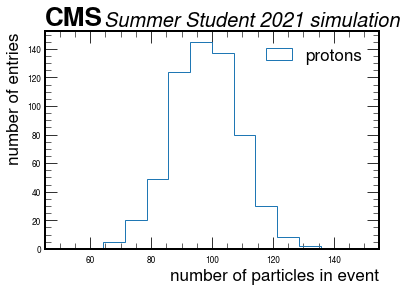

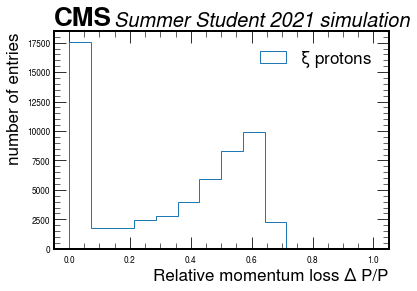

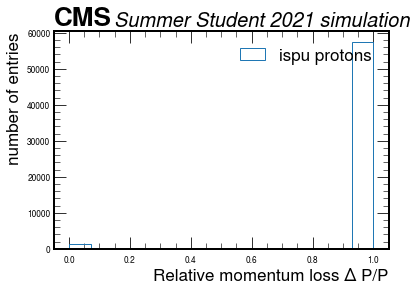

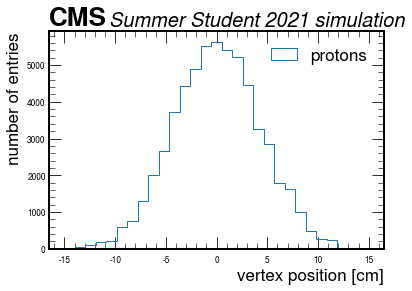

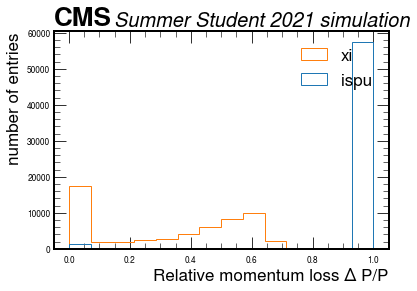

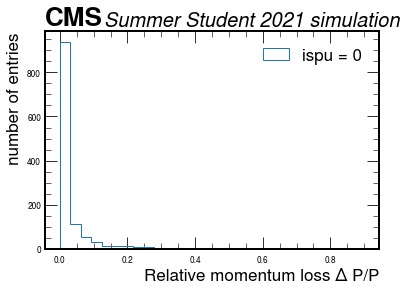

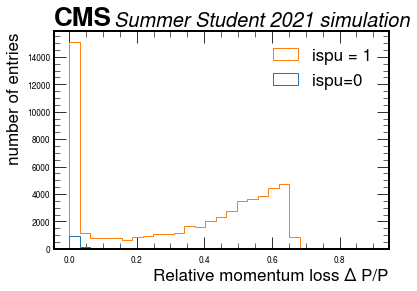

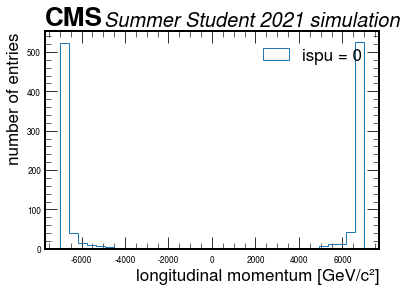

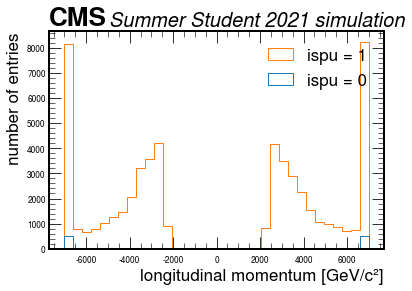

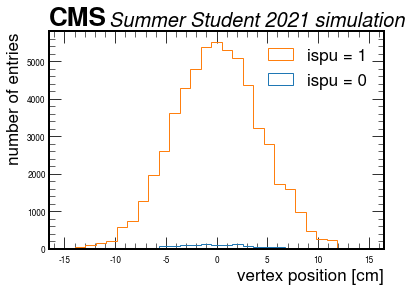

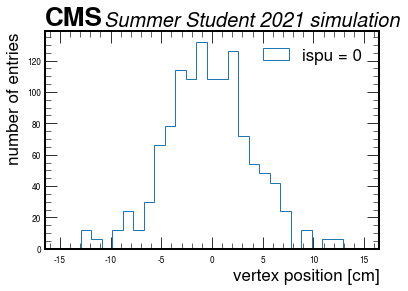

In [4]:
#Protons   Be aware thet the labels will twist for some magical reason !
protons = tree.arrays(['genproton_xi','genproton_ispu'],library="pd")
protonspz = tree.arrays(['genproton_pz','genproton_ispu'],library="pd")

hist1D([tree['genproton_size'].array(library="pd")], np.linspace(50,150,15),'number of particles in event',['protons'], 'final/proton_size.png',False)
hist1D([tree['genproton_xi'].array(library ="pd")], np.linspace(0,1,15),'Relative momentum loss \u0394 P/P', [r'$\xi$ protons'],'final/proton_xi.png',False)
hist1D([tree['genproton_ispu'].array(library ="pd")], np.linspace(0,1,15),'Relative momentum loss \u0394 P/P',['ispu protons'], 'final/proton_ispu.png',False)
hist1D([tree['genproton_vz'].array(library ="pd")], np.linspace(-15,15,30),'vertex position [cm]',['protons'], 'final/proton_vz.png',False)

p = protons[protons.genproton_ispu==0]['genproton_xi'].values
pu = protons[protons.genproton_ispu==1]['genproton_xi'].values
hist1D([tree['genproton_ispu'].array(library ="pd"),tree['genproton_xi'].array(library ="pd")], np.linspace(0,1,15),'Relative momentum loss \u0394 P/P',['xi','ispu'], 'final/proton_ispu_rare.png',False)
hist1D([p], np.linspace(0,0.9,30),'Relative momentum loss \u0394 P/P',['ispu = 0'], 'final/proton_xi_combined.png',False)
hist1D([p,pu], np.linspace(0,0.9,30),'Relative momentum loss \u0394 P/P',['ispu = 1','ispu=0'], 'final/proton_ispu_xi_combined.png',False)

p = protonspz[protonspz.genproton_ispu==0]['genproton_pz'].values
pu = protonspz[protonspz.genproton_ispu==1]['genproton_pz'].values
hist1D([p], np.linspace(-7000,7000,35),'longitudinal momentum [GeV/c²]',['ispu = 0'], 'final/proton_pz.png',False)
hist1D([p,pu], np.linspace(-7000,7000,35),'longitudinal momentum [GeV/c²]',['ispu = 1','ispu = 0'], 'final/proton_pz_combined.png',False)

protonsvz = tree.arrays(['genproton_vz', 'genproton_ispu'], library = "pd")
p = protonsvz[protonsvz.genproton_ispu==0]['genproton_vz'].values
pu = protonsvz[protonsvz.genproton_ispu==1]['genproton_vz'].values
hist1D([p,pu], np.linspace(-15,15,30),'vertex position [cm]',['ispu = 1','ispu = 0'], 'final/proton_vz_combined.png',False)
hist1D([p], np.linspace(-15,15,30),'vertex position [cm]',['ispu = 0'], 'final/proton_vz_com.png',False)


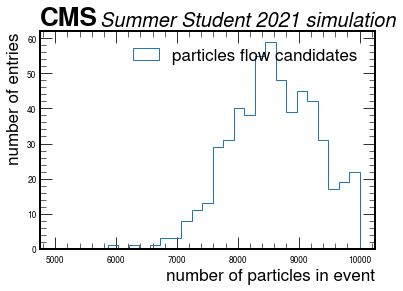

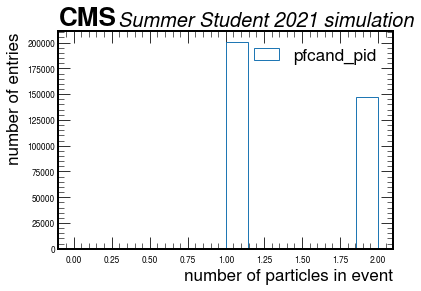

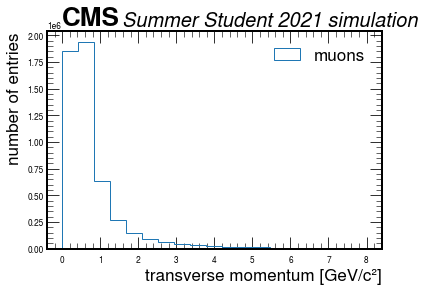

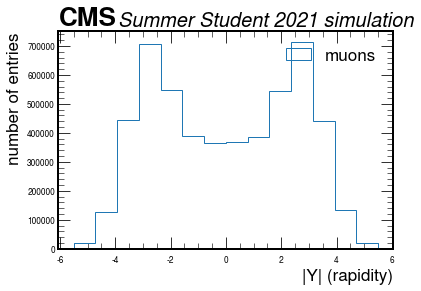

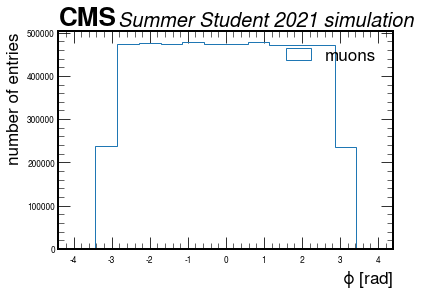

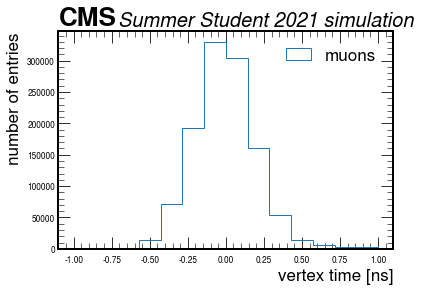

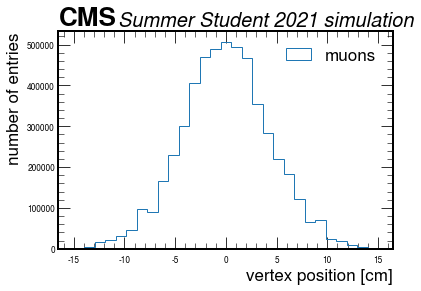

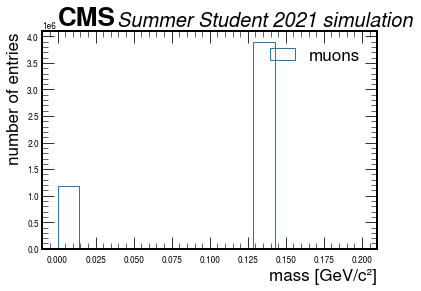

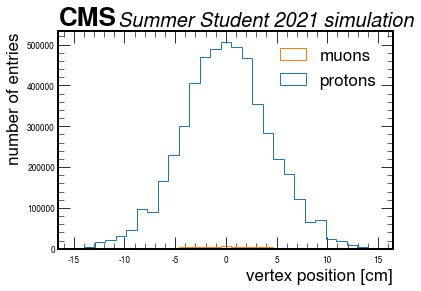

In [5]:
#Muons
hist1D([tree['pfcand_size'].array(library = "pd")], np.linspace(5000,10000,30),'number of particles in event', ['particles flow candidates'], 'final/N_pfcand.png',False)
hist1D([tree['pfcand_pid'].array(library = "pd")], np.linspace(0,2,15),'number of particles in event',['pfcand_pid'] ,'final/muons_pid.png',False)

#Read all particle-flow candidates into a pandas dataframe:
PFcand= tree.arrays(['pfcand_pt','pfcand_eta','pfcand_phi','pfcand_t','pfcand_vz','pfcand_pid'],library="pd")
#extract muons from the dataframe:
muons = PFcand[(PFcand.pfcand_pid==-13) | (PFcand.pfcand_pid==13)]
#remove the column 'pid':
muons.drop(['pfcand_pid'],axis=1)

mu_pt = tree['pfcand_pt'].array(library = "pd")
hist1D([mu_pt], np.linspace(0,8,20),'transverse momentum [GeV/c²]',['muons'] ,'final/muons_pt.png',False)

hist1D([tree['pfcand_eta'].array(library = "pd")], np.linspace(-5.5,5.5,15),'|Y| (rapidity)',['muons'] ,'final/muons_eta.png',False)
hist1D([tree['pfcand_phi'].array(library = "pd")], np.linspace(-4,4,15),r'$\phi$ [rad]',['muons'] ,'final/muons_phi.png',False)
hist1D([tree['pfcand_t'].array(library = "pd")], np.linspace(-1,1,15),'vertex time [ns]',['muons'] ,'final/muons_t.png',False)
hist1D([tree['pfcand_vz'].array(library = "pd")], np.linspace(-15,15,30),'vertex position [cm]',['muons'] ,'final/muons_vz.png',False)
hist1D([tree['pfcand_mass'].array(library = "pd")], np.linspace(0,0.2,15),'mass [GeV/c²]',['muons'] ,'final/muons_mass.png',False)

#Combine muon and proton plots
hist1D([tree['pfcand_vz'].array(library = "pd"),tree['genproton_vz'].array(library = "pd")], np.linspace(-15,15,30),'vertex position [cm]',['muons','protons'] ,'final/mu_proton_vz.png',False)


# Analyse di-muon and signal to pu relations

In [3]:
#Getting files for Bg Sig
#Execute this line if running on SWAN, otherwise update the path to the data files:
PATH='/eos/cms/store/user/jjhollar/CERNSummerStudentProject2021/'
#PATH='data'
filename=PATH+'/gammagammaMuMu_FPMC_pT25_14TeV_PU200_NTUPLE_jobs123merge_version4.root'
#load the file content
tree = uproot.open(filename+":myana/mytree")
#tree.show()

filename=PATH+'DYMuMu_PU200_NTUPLE_1_version3.root'
bg_tree = uproot.open(filename+":myana/mytree")

#Create signal tree - with ispu 
event_info = tree.arrays(['genvtx_t0']) 
muons = tree.arrays(['pfcand_pt','pfcand_eta','pfcand_phi','pfcand_mass','pfcand_t','pfcand_vz'],'abs(pfcand_pid)==13') 
protons = tree.arrays(['genproton_xi','genproton_pz','genproton_vz','genproton_ispu']) 
vertices = tree.arrays(['vtx4D_t','vtx4D_z','vtx4D_pt2']) 

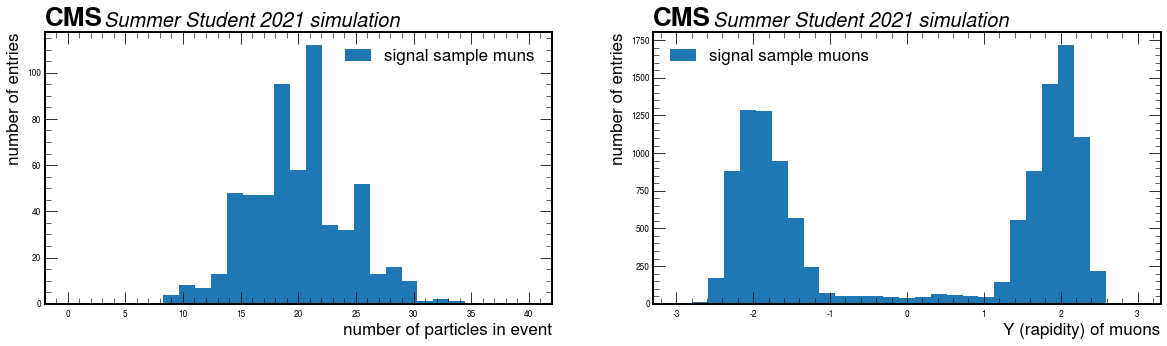

In [7]:
#All 1D from rare signal input
#to get the number of muons in event we we will loop over all entries and append length of the muon array: 
n_muons = []
for i in range(0,len(muons)):
    n_muons.append(len(muons.pfcand_pt[i]))
double1D([n_muons],[muons.pfcand_eta.layout.content], np.linspace(0,40,30), np.linspace(-3,3,30), 'number of particles in event', 'Y (rapidity) of muons', ['signal sample muns'],['signal sample muons'],'final/uncut_n_y_muons_.png')

# Getting signal and pile up (no momentum smearing applied)

In [4]:
sqrt_s = 14000
zpps = 2.34e4 #in cm
c = 29.9792#in cm/ns 

sig_data = {}
mh.InitData(sig_data)
#loop over all events for the signal
N = len(muons)
for i in tqdm(range(N)): 
    #find index of two highest pT muons with pT > 25 GeV
    mu=muons[i]
    mu1_idx, mu2_idx = mh.SelMu(mu)            
    #if found less than 2 muons, skip the event:
    if mu1_idx<0 or mu2_idx<0: continue 
    mu1, mu2 = mh.GiveMu(mu, mu1_idx, mu2_idx)
    #exclude muons with dummy values
    if (mu.pfcand_t[mu1_idx]<-80 or mu.pfcand_t[mu2_idx]<-80): continue
    xi_dimu_plus = ((mu1.Pt()*np.exp(mu1.Rapidity())+mu2.Pt()*np.exp(mu2.Rapidity())) / sqrt_s) 
    xi_dimu_minus =((mu1.Pt()*np.exp(-mu1.Rapidity())+mu2.Pt()*np.exp(-mu2.Rapidity())) / sqrt_s)
    #additional cut
    #Station 1-3
    if((xi_dimu_plus<0.01) == True & (xi_dimu_minus<0.01) == True): continue 
    #Station 4
    #if((xi_dimu_plus<0.0032) == True & (xi_dimu_minus<0.0032) == True): continue   
    # find two signal protons:
    pr=protons[i]
    # smearing and selecting protons
    pr1_idx, pr2_idx = mh.SelSigProtons(pr,mu1,mu2, xi_dimu_plus, xi_dimu_minus)
    if pr1_idx<0 or pr2_idx<0: continue
    vx = vertices[i]
    ev = event_info[i]
    #Filling muon and proton events
    mh.Fill_mu(sig_data, mu, mu1, mu2, mu1_idx,mu2_idx)
    mh.Fill_pr(sig_data,pr,pr1_idx,pr2_idx,vx,ev)
    mh.Sig_time(sig_data, ev, pr, pr1_idx, pr2_idx)
    #Add smeared proton times
    mh.Fill_smeared_pr_t(sig_data)
sig = pd.DataFrame(data=sig_data)

pu_data = {}
mh.InitData(pu_data)
#loop over all events for the signal
N = len(muons)
for i in tqdm(range(N)): 
    #find index of two highest pT muons with pT > 25 GeV
    mu=muons[i]
    mu1_idx, mu2_idx = mh.SelMu(mu)            
    #if found less than 2 muons, skip the event:
    if mu1_idx<0 or mu2_idx<0: continue 
    mu1, mu2 = mh.GiveMu(mu, mu1_idx, mu2_idx)
    #exclude muons with dummy values
    if (mu.pfcand_t[mu1_idx]<-80 or mu.pfcand_t[mu2_idx]<-80): continue
    xi_dimu_plus = ((mu1.Pt()*np.exp(mu1.Rapidity())+mu2.Pt()*np.exp(mu2.Rapidity())) / sqrt_s) 
    xi_dimu_minus =((mu1.Pt()*np.exp(-mu1.Rapidity())+mu2.Pt()*np.exp(-mu2.Rapidity())) / sqrt_s)
    #additional cut
    #Station 1-3
    if((xi_dimu_plus<0.01) == True & (xi_dimu_minus<0.01) == True): continue 
    #Station 4
    #if((xi_dimu_plus<0.0032) == True & (xi_dimu_minus<0.0032) == True): continue   
    # find two signal protons:
    pr=protons[i]
    # smearing and selecting protons
    pr1_idx, pr2_idx = mh.SelPuProtons(pr,mu1,mu2, xi_dimu_plus, xi_dimu_minus)
    if pr1_idx<0 or pr2_idx<0: continue
    vx = vertices[i]
    ev = event_info[i]
    #Filling muon and proton events
    mh.Fill_mu(pu_data, mu, mu1, mu2, mu1_idx,mu2_idx)
    mh.Fill_pr(pu_data,pr,pr1_idx,pr2_idx,vx,ev)
    mh.Sig_time(pu_data, ev, pr, pr1_idx, pr2_idx)
    #Add smeared proton times
    mh.Fill_smeared_pr_t(pu_data)
pu = pd.DataFrame(data=pu_data)

100%|██████████| 600/600 [00:03<00:00, 194.04it/s]


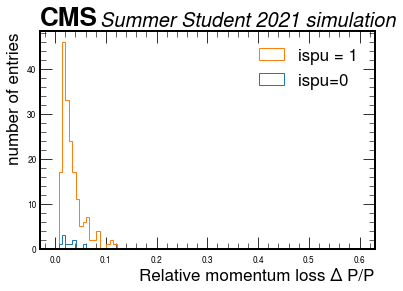

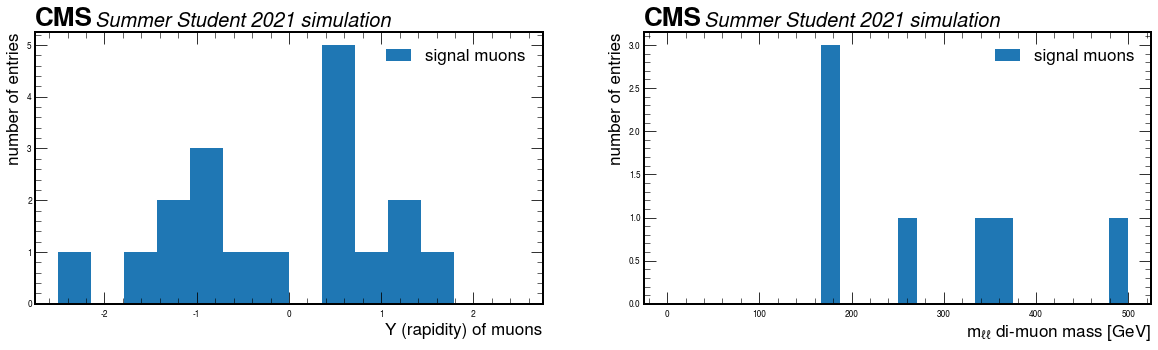

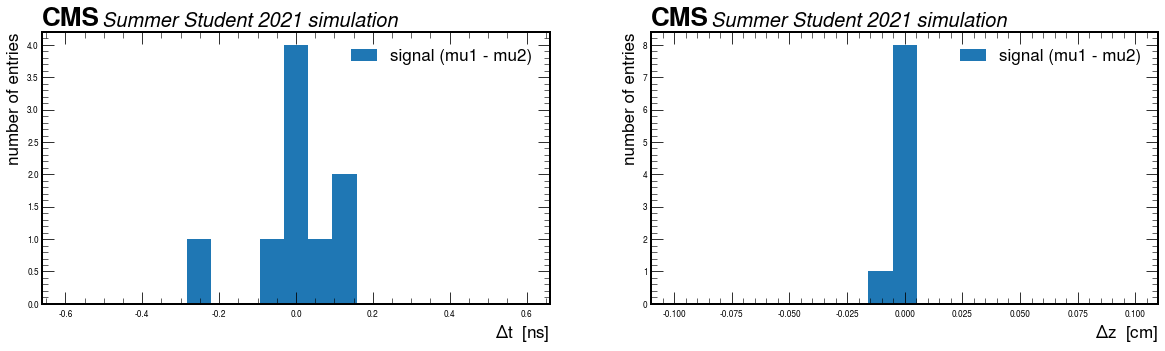

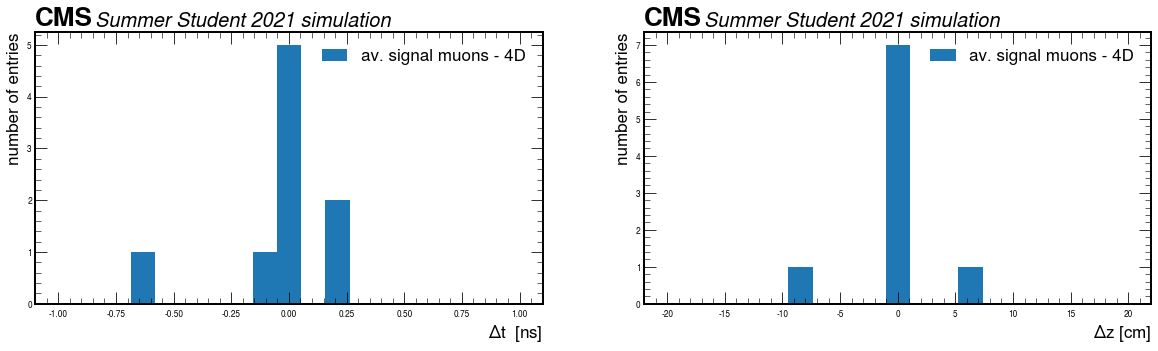

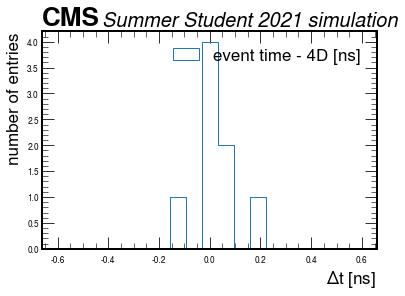

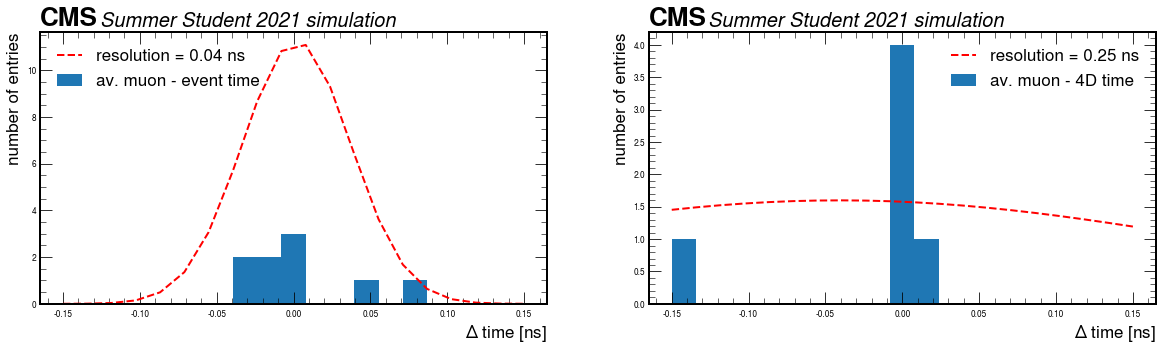

In [5]:
#Note that for muons and protons, you have 2 of each
#if you are interested in the correlation between proton_vz and muon_vz, you can try to use the average value
#of two particles:
protons_vz = np.average([sig['pr1_vz'].values,sig['pr2_vz'].values],axis=0)
muons_vz = np.average([sig['mu1_vz'].values,sig['mu2_vz'].values],axis=0)
muons_tz = np.average([sig['mu1_t'].values,sig['mu2_t'].values],axis=0)
protons_xi = np.average([sig['pr1_xi'].values, sig['pr2_xi'].values],axis=0)
pu_proton_xi = np.average([pu['pr1_xi'].values, pu['pr2_xi'].values],axis=0)

#hist1D([tree['genproton_ispu'].array(library ="pd"),tree['genproton_xi'].array(library ="pd")], np.linspace(0,1,15),'Relative momentum loss \u0394 P/P',['xi','ispu'], 'final/proton_ispu_rare.png',False)
#hist1D([protons_xi], np.linspace(0,0.9,30),'Relative momentum loss \u0394 P/P',['ispu = 0'], 'final/proton_xi_combined.png',False)
hist1D([protons_xi,pu_proton_xi], np.linspace(0,0.6,90),'Relative momentum loss \u0394 P/P',['ispu = 1','ispu=0'], 'final/proton_ispu_xi_combined.png',False)

#All 1D from preselected signal input
double1D(np.concatenate([sig['mu1_eta'].values,sig['mu2_eta'].values]),sig['mll'].values,np.linspace(-2.5,2.5,15),np.linspace(0,500,25),r'Y (rapidity) of muons',r'$m_{\ell\ell}$ di-muon mass [GeV]' ,['signal muons'],['signal muons'], 'final/dimuon_mass_rapidity.png')
double1D(sig['mu1_t'].values-sig['mu2_t'].values, sig['mu1_vz'].values-sig['mu2_vz'].values,np.linspace(-0.6,0.6,20),np.linspace(-0.1,0.1,20),r'$\Delta t$  [ns]',r'$\Delta z$  [cm]',['signal (mu1 - mu2)'],['signal (mu1 - mu2)'], 'final/mu1_mu2_diff_tvz.png')
double1D(muons_tz - sig['pr_vtx_t'].values,muons_vz - sig['pr_vtx_z'].values,np.linspace(-1,1,20),np.linspace(-20,20,20),r'$\Delta t$  [ns]',r'$\Delta z$ [cm]' ,['av. signal muons - 4D'],['av. signal muons - 4D'], 'final/diff_muons_4d.png')

hist1D(sig['evt_t0'].values - sig['pr_vtx_t'].values, np.linspace(-0.6,0.6,20),r'$\Delta t$ [ns] ',['event time - 4D [ns]'],'final/difft_evt_4D.png',False, )
#MTD resolution plots
doubleMTDfit(muons_tz - sig['evt_t0'].values, muons_tz - sig['pr_vtx_t'].values, np.linspace(-0.15,0.15,20),np.linspace(-0.15,0.15,20),r'$\Delta$ time [ns]', r'$\Delta$ time [ns]', ['av. muon - event time'], ['av. muon - 4D time'],'final/MTD_unsmeared.png')

# 2D scatterplots

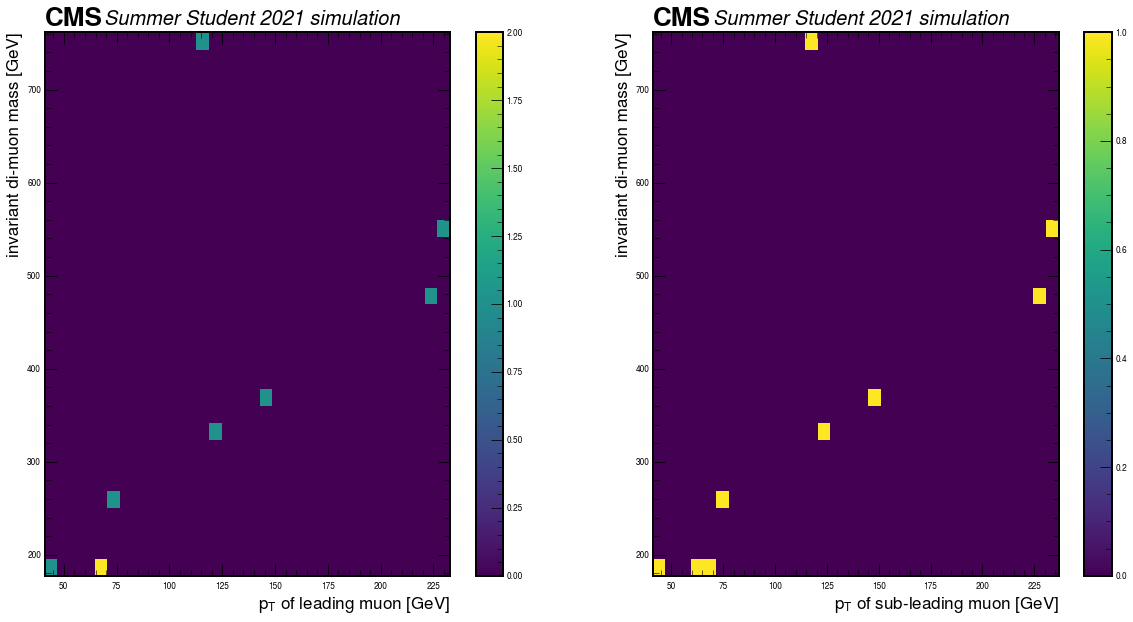

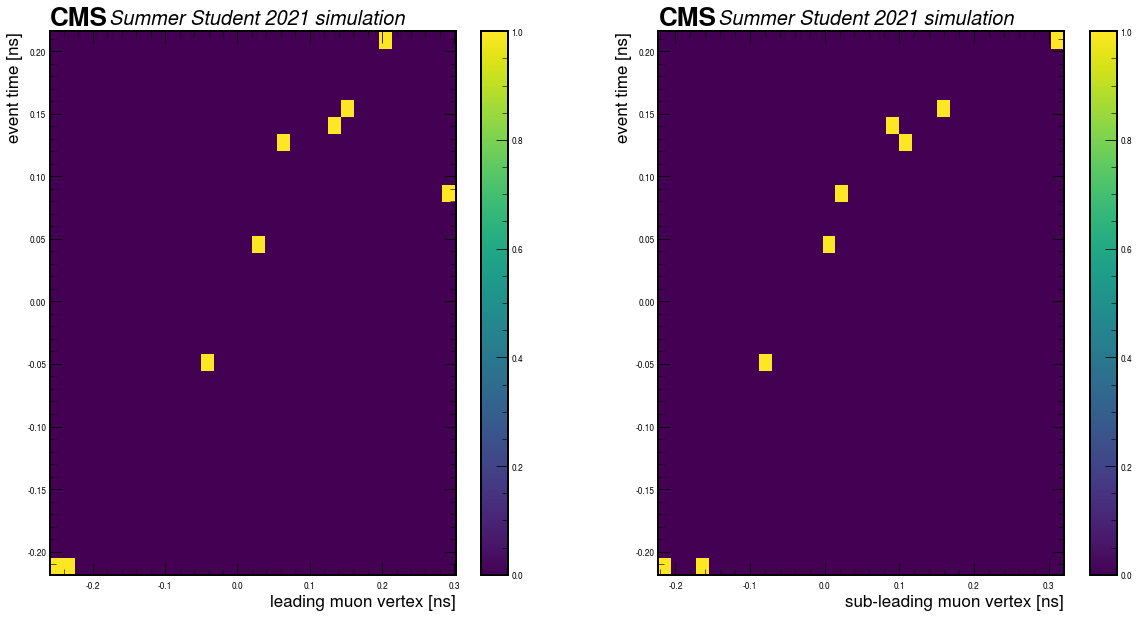

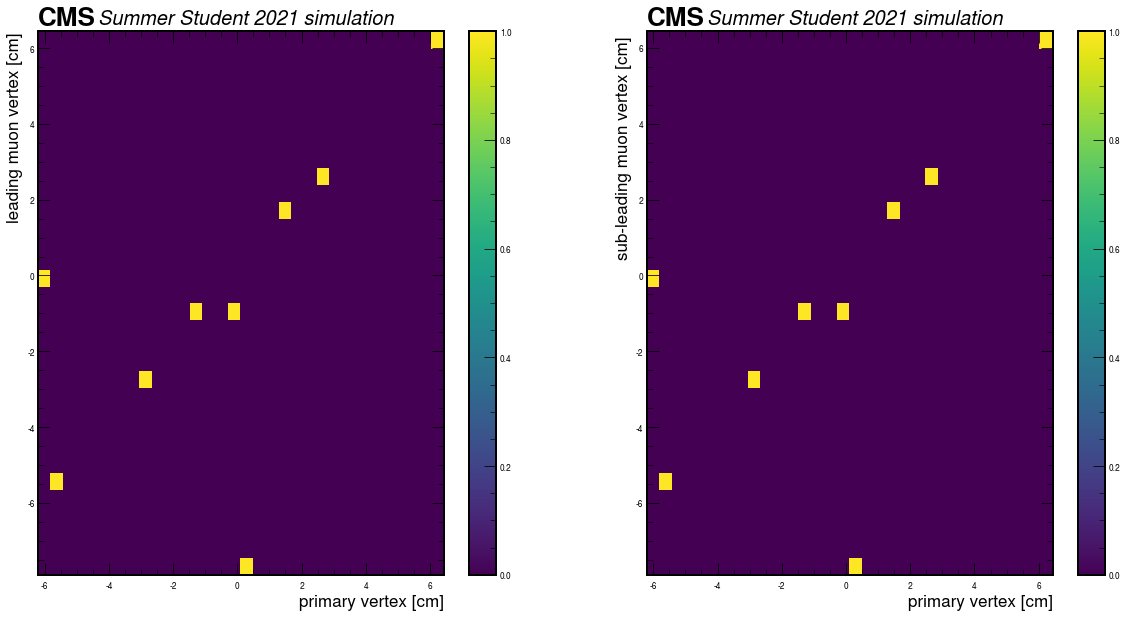

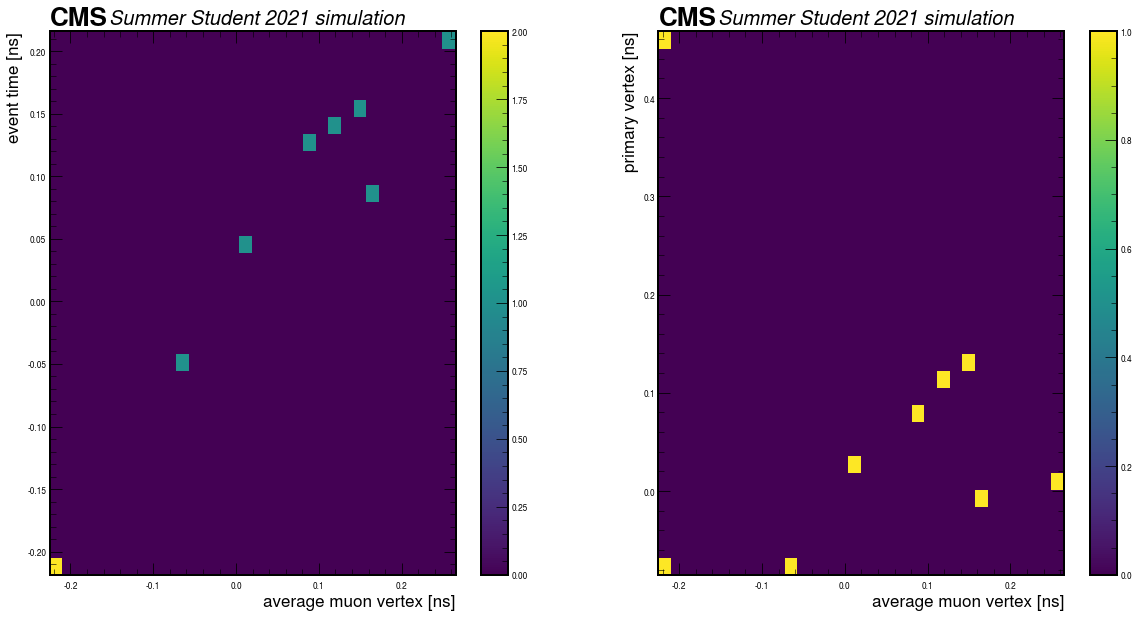

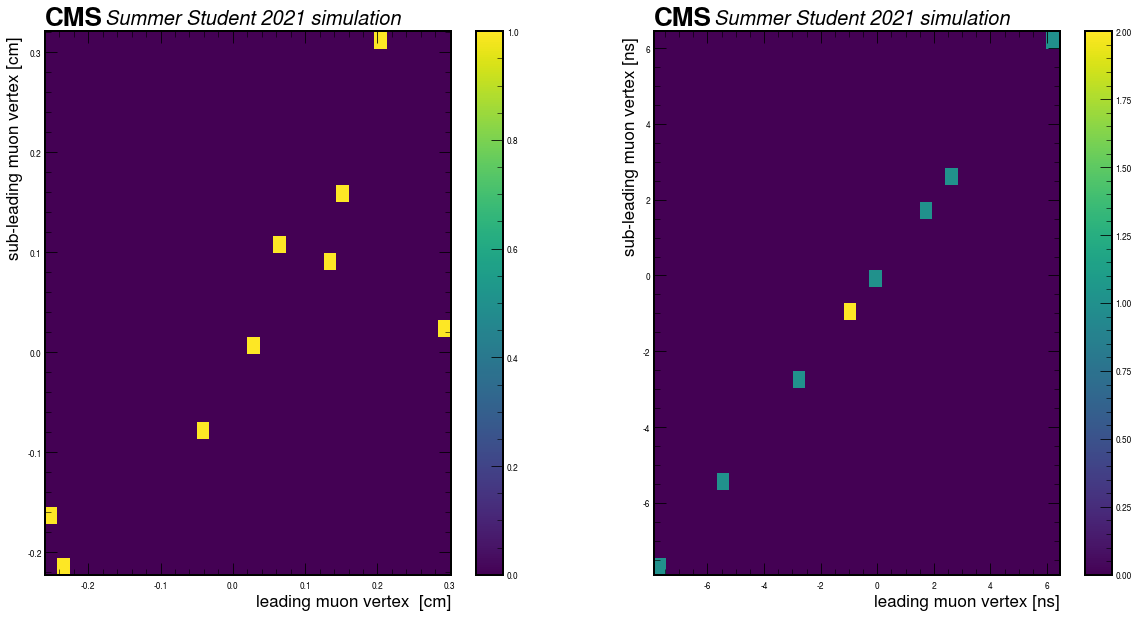

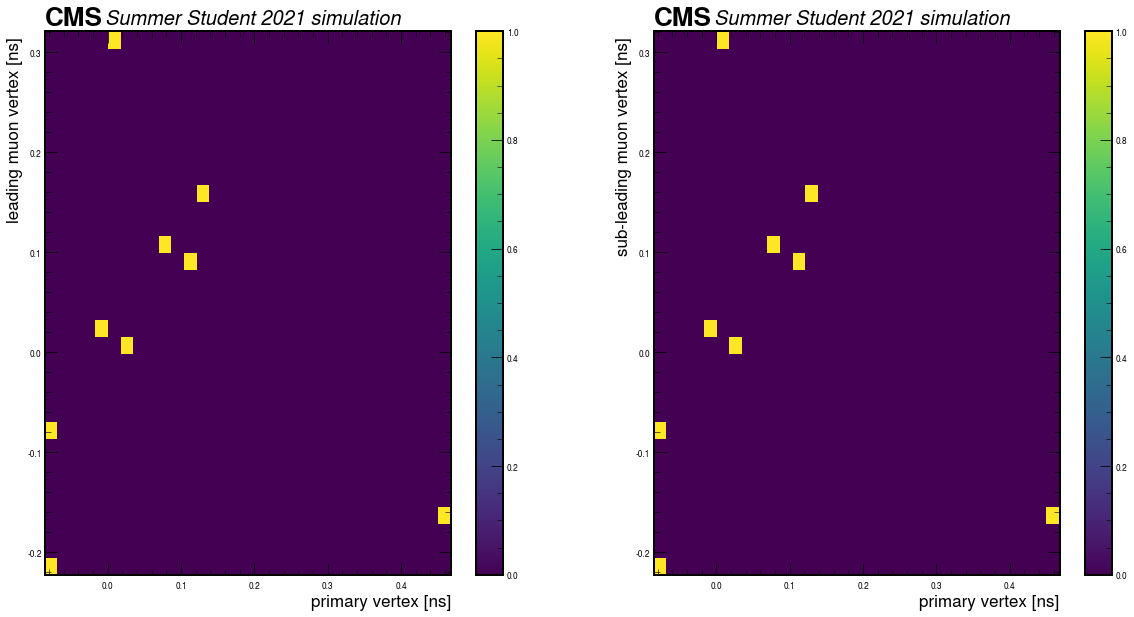

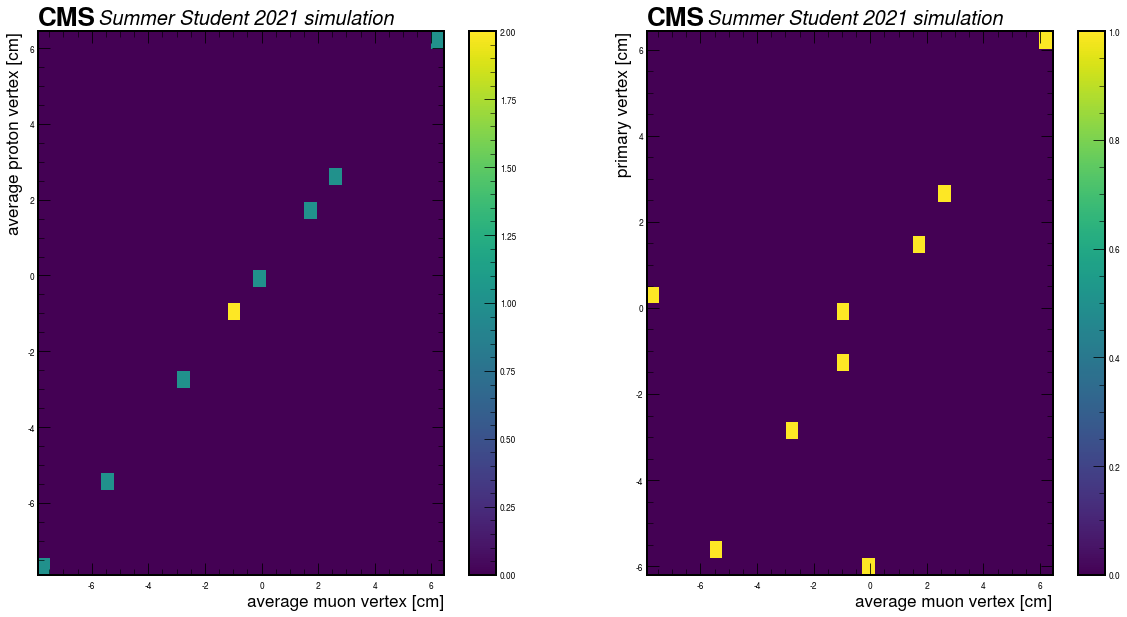

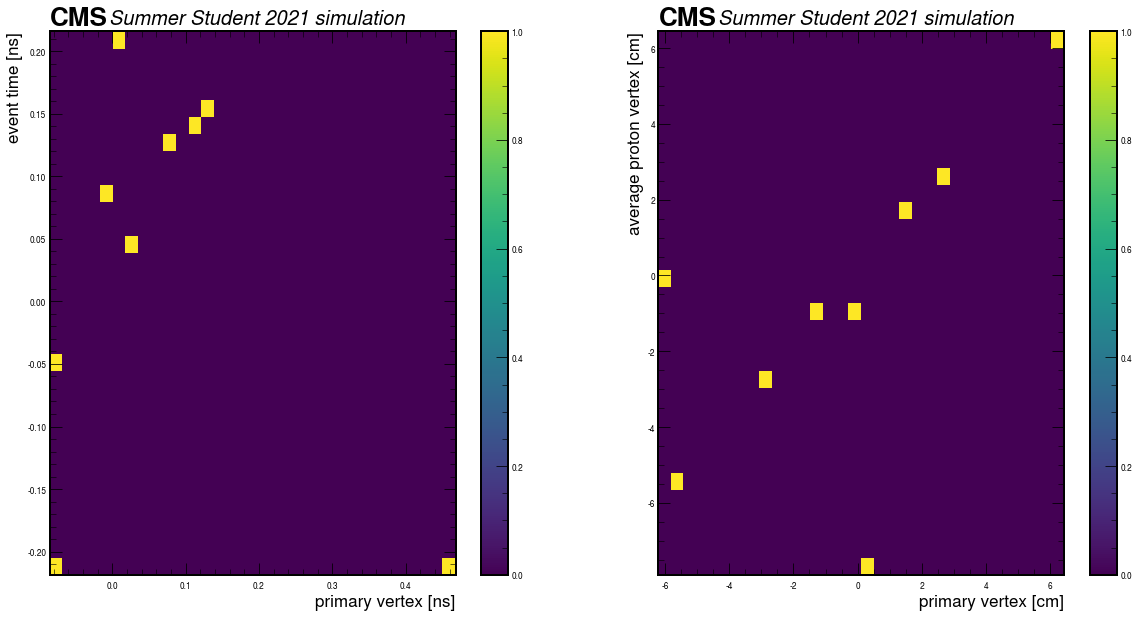

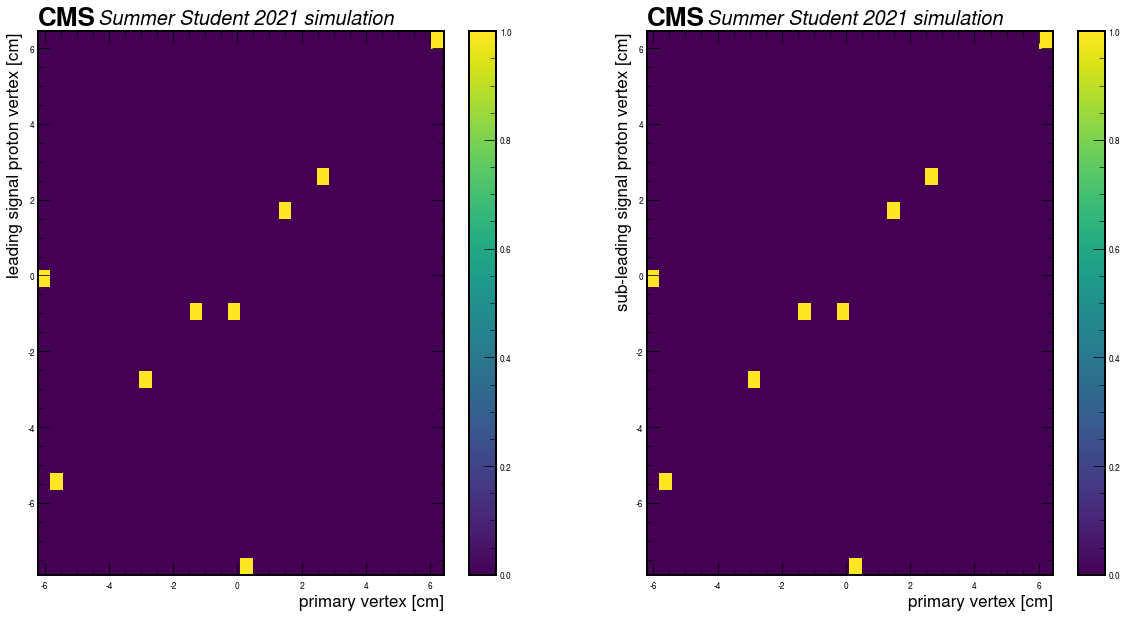

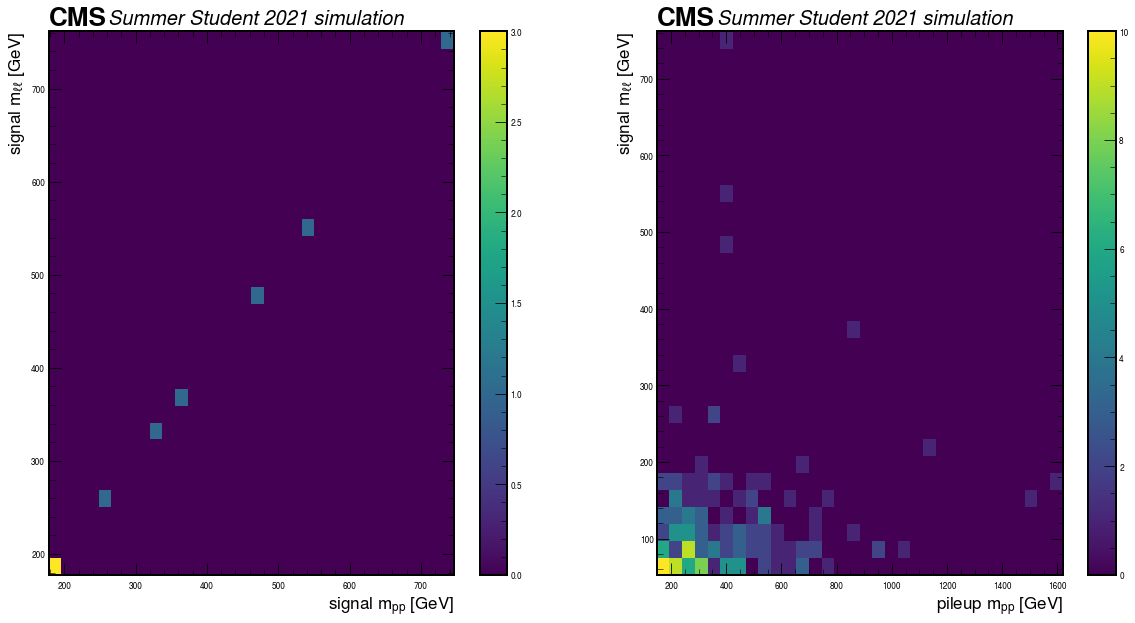

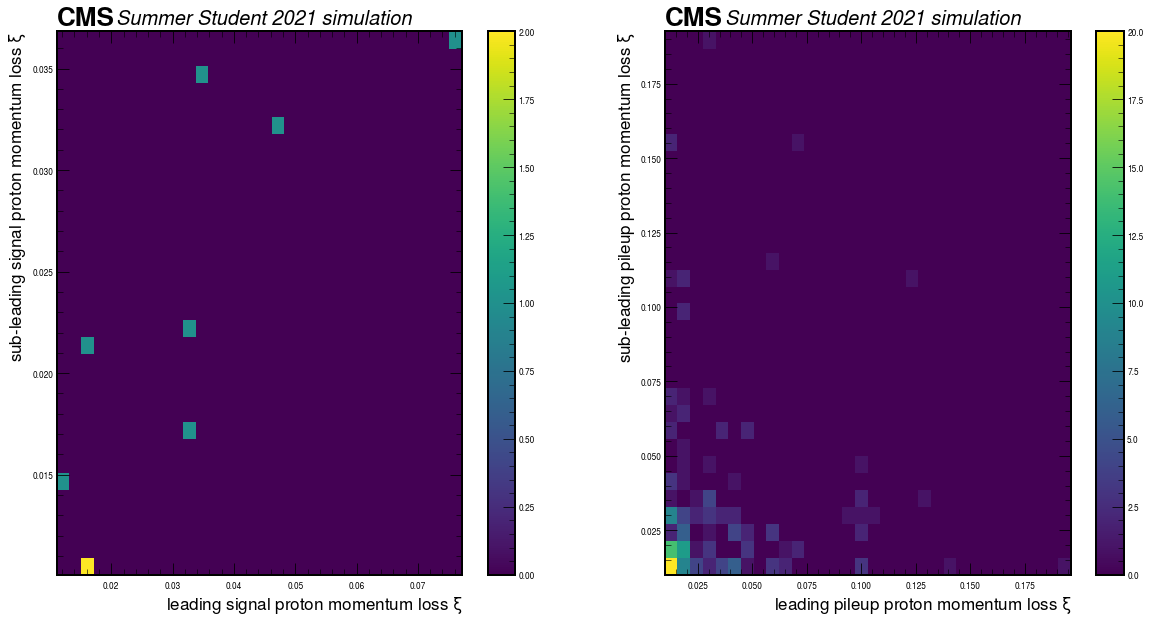

In [6]:
#Muon pT (single) vs invarint mass
double2D(sig['mu2_pt'].values, sig['mll'].values, sig['mu1_pt'].values, sig['mll'].values,(32,32), (32,32), r'$p_T$ of leading muon [GeV]','invariant di-muon mass [GeV]', r'$p_T$ of sub-leading muon [GeV]','invariant di-muon mass [GeV]','final/dimuon_pT_invm_correlation.png') 
#Muon time (single) and event time
double2D(sig['mu2_t'].values, sig['evt_t0'].values, sig['mu1_t'].values, sig['evt_t0'].values,(32,32), (32,32), 'leading muon vertex [ns]', 'event time [ns]','sub-leading muon vertex [ns]', 'event time [ns]','final/dimuon_analysis_time_correlation_masked.png')
#Muon position (single) and primary position
double2D(sig['pr_vtx_z'].values, sig['mu1_vz'].values, sig['pr_vtx_z'].values, sig['mu2_vz'].values,(32,32), (32,32), r'primary vertex [cm]', r'leading muon vertex [cm]',r'primary vertex [cm]', r'sub-leading muon vertex [cm] ','final/corr_muon_vertex_pos.png')
#Muon time average and evt and prim
double2D(muons_tz, sig['evt_t0'].values, muons_tz, sig['pr_vtx_t'].values,(32,32), (32,32), 'average muon vertex [ns]', 'event time [ns]','average muon vertex [ns]', 'primary vertex [ns]','final/corr_dimuon_time_evt_prim.png')
#Muon (singel) position and time vertex
double2D(sig['mu2_t'].values, sig['mu1_t'].values, sig['mu2_vz'].values, sig['mu1_vz'].values,(32,32), (32,32), r'leading muon vertex  [cm]', r'sub-leading muon vertex [cm] ',r'leading muon vertex [ns]',r'sub-leading muon vertex [ns] ','final/corr_mu1mu2_t_z.png')
#Muon (single) and primary vertex time
double2D(sig['pr_vtx_t'].values, sig['mu1_t'].values, sig['pr_vtx_t'].values, sig['mu1_t'].values,(32,32), (32,32), r'primary vertex [ns]', r'leading muon vertex [ns] ',r'primary vertex [ns]',r'sub-leading muon vertex [ns] ','final/corr_vtx4Dt0_mu1mu2.png')
#Muon and proton vertex position
double2D(muons_vz, protons_vz, muons_vz, sig['pr_vtx_z'].values,(32,32), (32,32), r'average muon vertex [cm]','average proton vertex [cm]',r'average muon vertex [cm]', 'primary vertex [cm]','final/corr_vz_avg_mu_prot_prim.png') 

#Event vs primary time and primary vs average proton position
double2D(sig['pr_vtx_t'].values, sig['evt_t0'].values, sig['pr_vtx_z'].values, protons_vz,(32,32), (32,32), r'primary vertex [ns]','event time [ns]',r'primary vertex [cm]', 'average proton vertex [cm]','final/corr_prim_evt_prot.png')

#Proton (single) and primary position
double2D(sig['pr_vtx_z'].values, sig['pr2_vz'].values, sig['pr_vtx_z'].values, sig['pr1_vz'].values,(32,32), (32,32), r'primary vertex [cm]', 'leading signal proton vertex [cm]',r'primary vertex [cm]', 'sub-leading signal proton vertex [cm]','final/corr_vtx4D0_p1_p2.png')

#Invariant mass sig and PU
double2D(sig['mpp'].values, sig['mll'].values, pu['mpp'].values, pu['mll'].values,(32,32), (32,32), r'signal $m_{pp}$ [GeV]',r'signal $m_{\ell \ell}$ [GeV]',r'pileup $m_{pp}$ [GeV]',r'signal $m_{\ell \ell}$ [GeV]','final/corr_mpp_mll.png')

#xi correlation sig PU
double2D(sig['pr2_xi'].values, sig['pr1_xi'].values, pu['pr2_xi'].values, pu['pr1_xi'].values,(32,32), (32,32), r'leading signal proton momentum loss $\xi$',r'sub-leading signal proton momentum loss $\xi$',r'leading pileup proton momentum loss $\xi$', r'sub-leading pileup proton momentum loss $\xi$','final/xi_corr_random.png')


# Results from total background and signal (with smearing)

In [7]:
filename=PATH+'DYMuMu_PU200_NTUPLE_1_version3.root'
bg_tree = uproot.open(filename+":myana/mytree")

#Create signal tree
event_info = tree.arrays(['genvtx_t0']) 
muons = tree.arrays(['pfcand_pt','pfcand_eta','pfcand_phi','pfcand_mass','pfcand_t','pfcand_vz'],'abs(pfcand_pid)==13') 
protons = tree.arrays(['genproton_xi','genproton_pz','genproton_vz','genproton_ispu'], '(genproton_ispu == 0) & (abs(genproton_pz)<6999) & (abs(genproton_pz)>0)')  
vertices = tree.arrays(['vtx4D_t','vtx4D_z','vtx4D_pt2']) 

#Create background tree
#Compressing the muon data
bg_muons =[]
for batch, report in bg_tree.iterate(['pfcand_pt','pfcand_eta','pfcand_phi','pfcand_mass','pfcand_t','pfcand_vz','pfcand_pid'], step_size=1000, report=True):
    #print(report)
    bg_muons.append(batch[(abs(batch.pfcand_pid)==13) & (batch.pfcand_pt>25)] )
bg_muons=ak.concatenate(bg_muons)

bg_protons = bg_tree.arrays(['genproton_xi','genproton_pz','genproton_vz','genproton_ispu'],'(abs(genproton_pz)<6999) & (abs(genproton_pz)>0)')
bg_event_info = bg_tree.arrays(['genvtx_t0']) 
bg_vertices = bg_tree.arrays(['vtx4D_t','vtx4D_z','vtx4D_pt2'])

#Get signal and background frames
sig, bg = st.create_frame(muons,protons,vertices, event_info, bg_muons,bg_protons, bg_vertices, bg_event_info)

# Signal to background double check

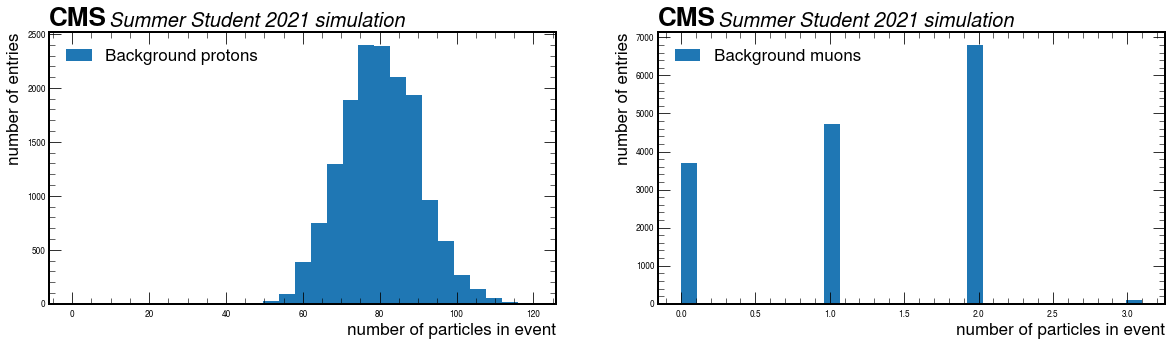

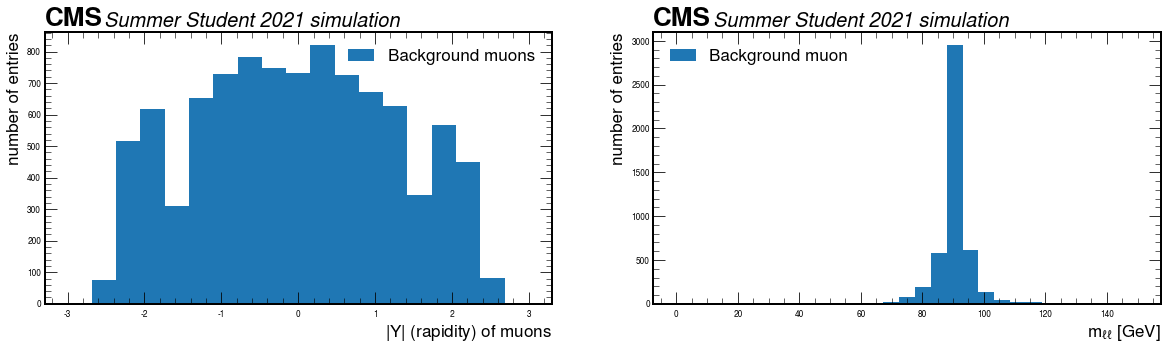

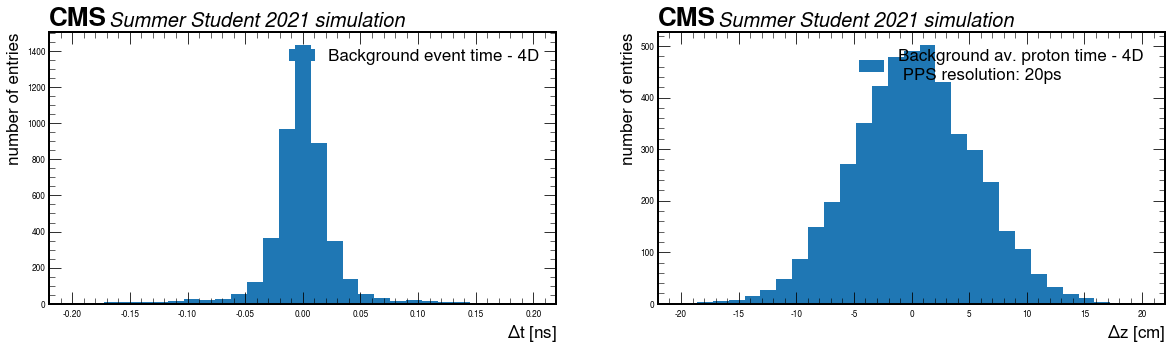

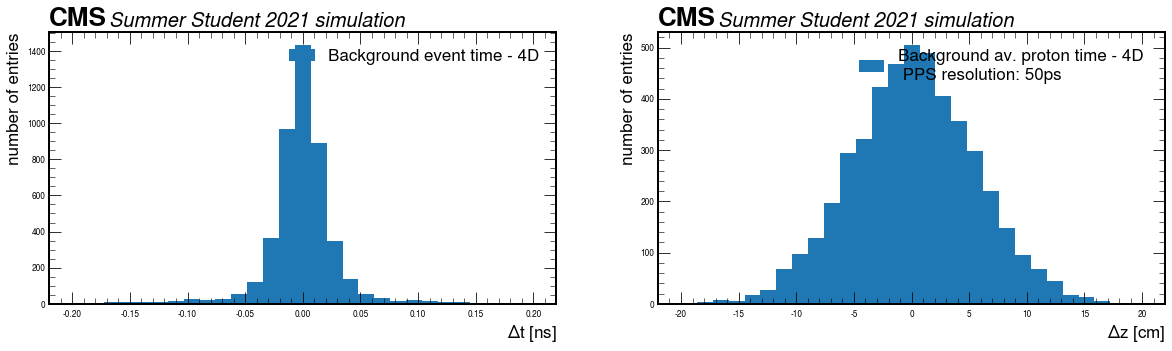

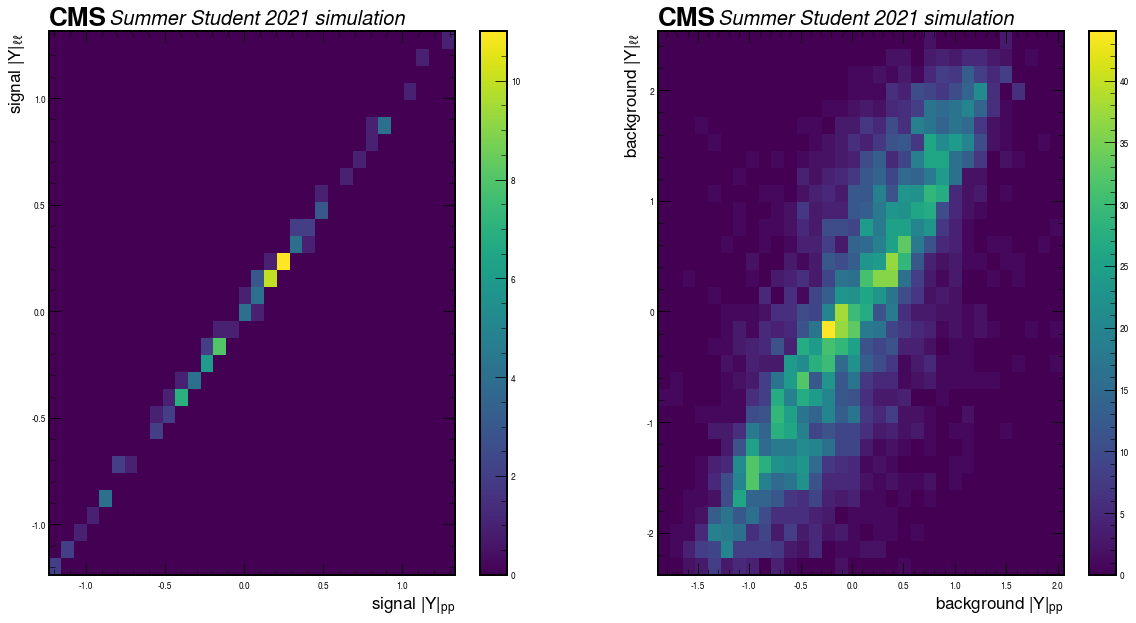

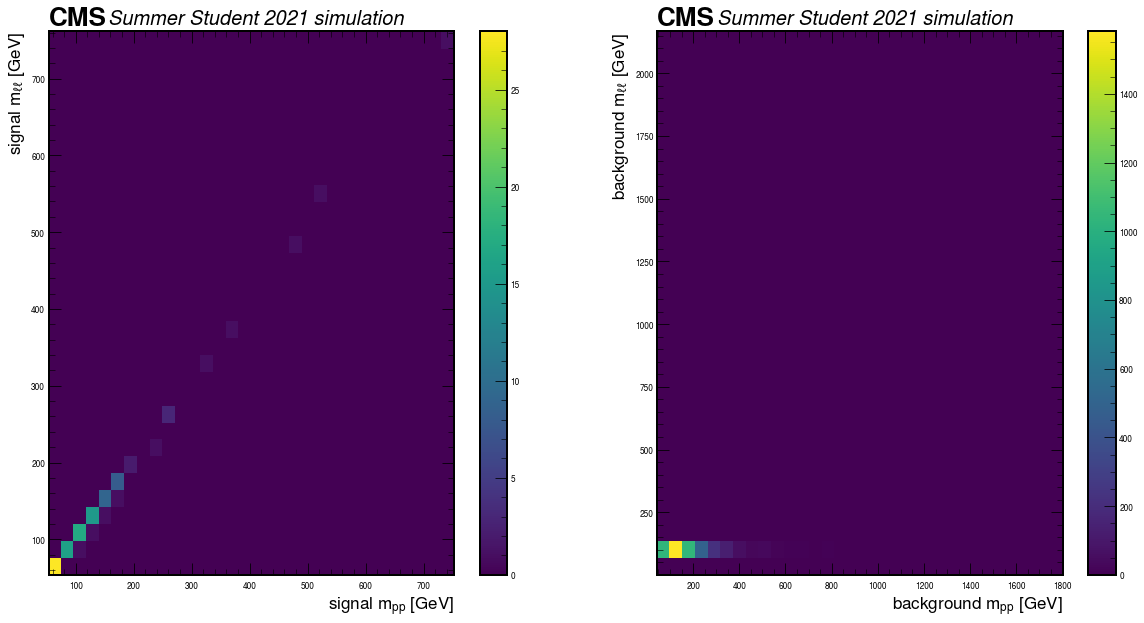

In [19]:
N_protons = []
for i in range(len(bg_protons)):
    N_protons.append(len(bg_protons.genproton_pz[i]))
N_muons = []
for i in range(len(bg_muons)):
    N_muons.append(len(bg_muons.pfcand_pt[i]))
double1D(N_protons, N_muons, np.linspace(0,120,30),np.linspace(0,3.1,30),'number of particles in event','number of particles in event',['Background protons'],['Background muons'] ,'final/N_bg_protons_muons.png')
#Muon mass and rapidity Background
double1D(np.concatenate([bg['mu1_eta'].values,bg['mu2_eta'].values]), bg['mll'].values, np.linspace(-3,3,20),np.linspace(0,150,30),r'$|Y|$ (rapidity) of muons',r'$m_{\ell\ell}$ [GeV]',['Background muons'],['Background muon'], 'final/Mass_rapidity_Bg_muons.png')
#Diff of bg evt/proton and primary
for res in [20,50]:
    double1D(bg['evt_t0'].values - bg['pr_vtx_t'].values, - (bg['pr1_'+str(res)+'_t'].values - bg['pr2_'+str(res)+'_t'].values)*c/2 - bg['pr_vtx_z'].values, np.linspace(-0.2,0.2,30),np.linspace(-20,20,30),r'$\Delta t$ [ns]',r'$\Delta z$ [cm]' ,['Background event time - 4D'],['Background av. proton time - 4D \n PPS resolution: '+str(res)+'ps'], 'final/evt_proton_4d_'+str(res)+'.png')

#Rapidity
double2D(sig['ypp'].values, sig['yll'].values, bg['ypp'].values, bg['yll'].values, (32,32), (32,32), r'signal $|Y|_{pp}$', r'signal $|Y|_{\ell \ell}$ ',r'background $|Y|_{pp}$', r'background $|Y|_{\ell \ell}$','final/corr_rapidity_bg_sig.png')
#Inv. mass signal background
double2D(sig['mpp'].values, sig['mll'].values, bg['mpp'].values, bg['mll'].values,(32,32), (32,32), r'signal $m_{pp}$ [GeV]', r'signal $m_{\ell \ell}$ [GeV]',r'background $m_{pp}$ [GeV]', r'background $m_{\ell \ell}$ [GeV]','final/corr_invmass_bg_sig.png')

# Selection plots

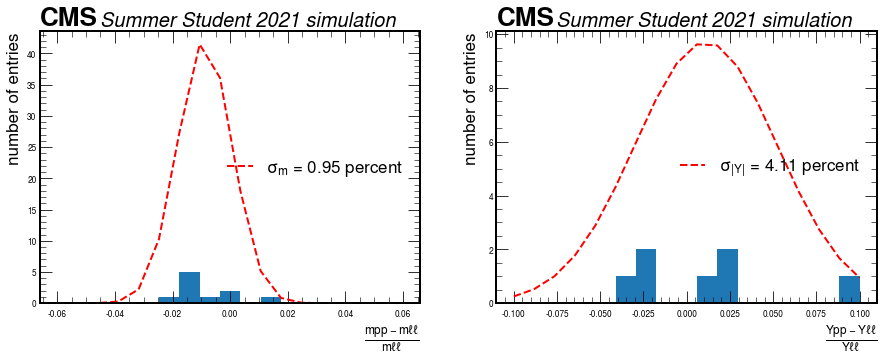

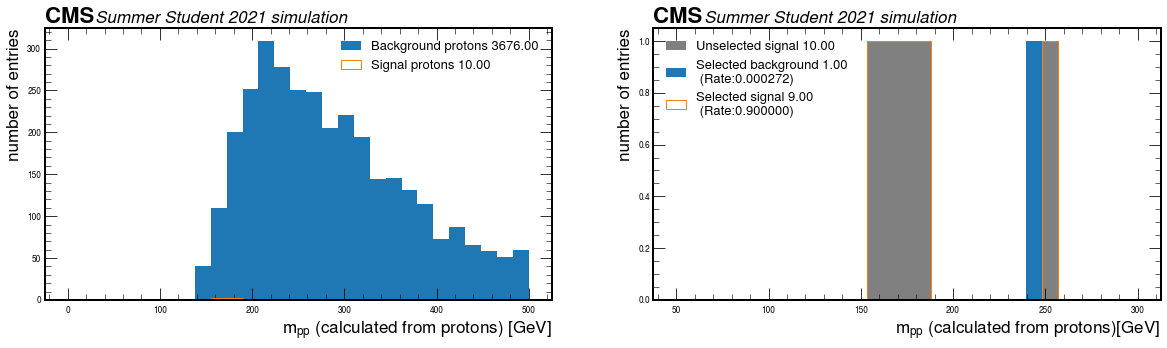

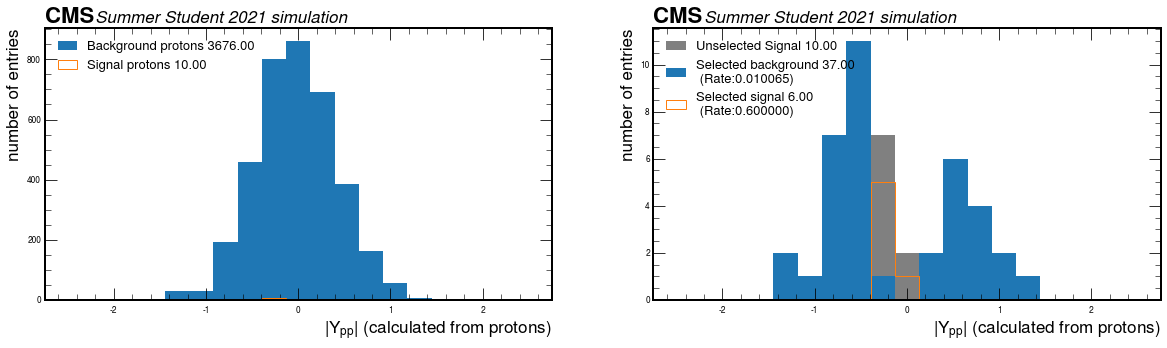

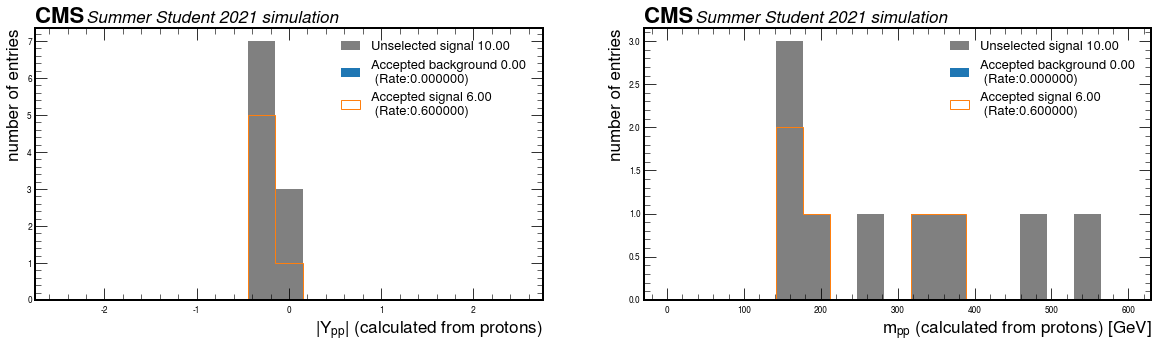

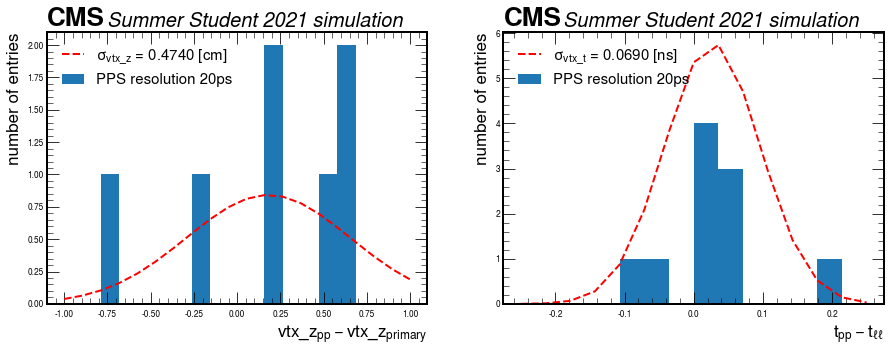

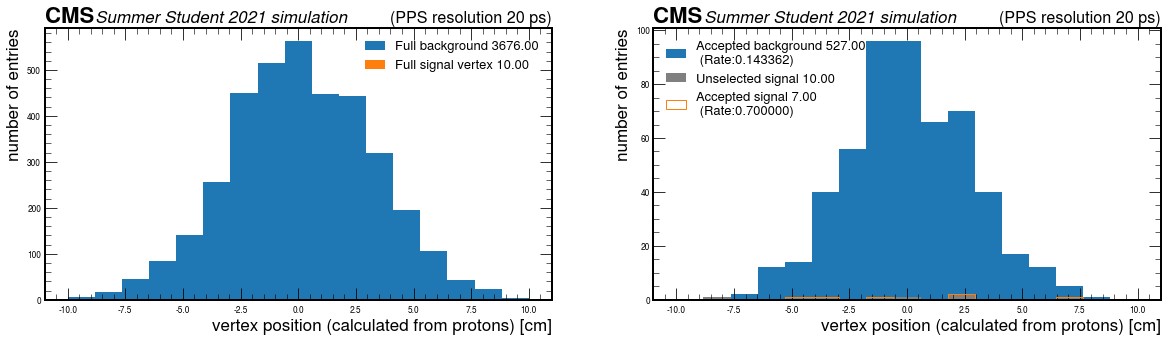

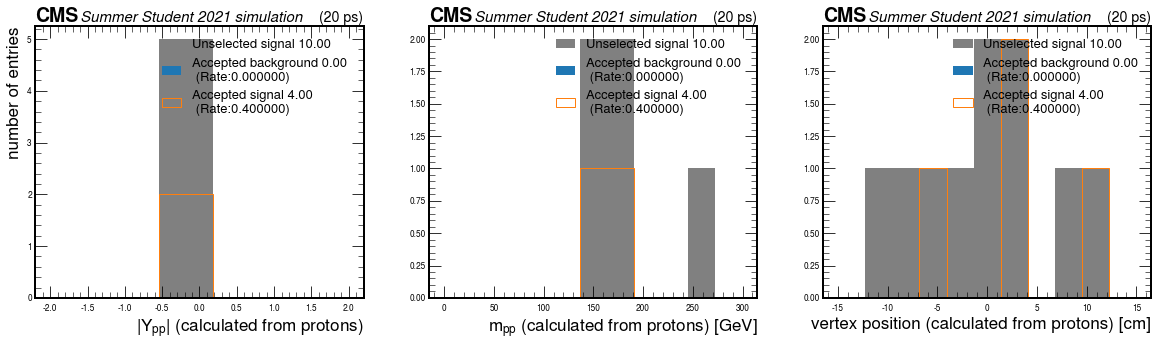

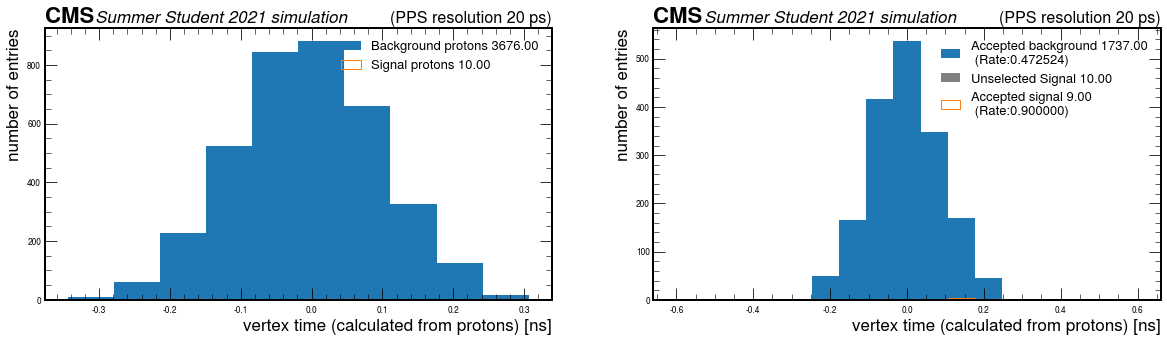

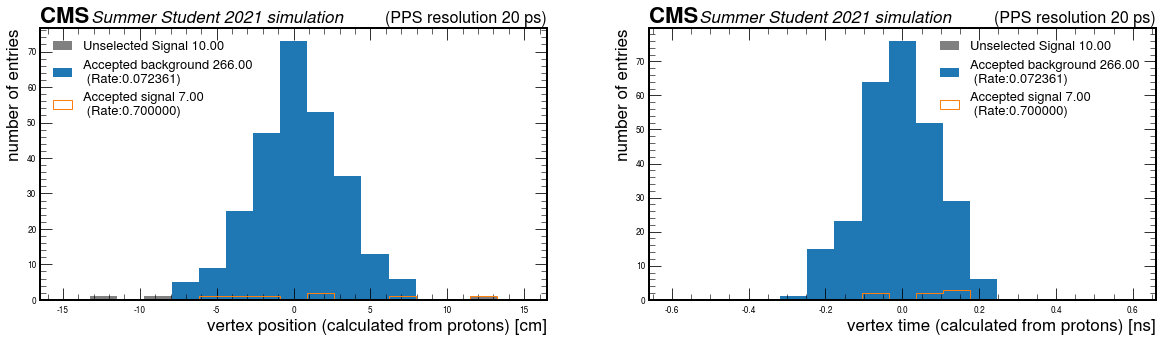

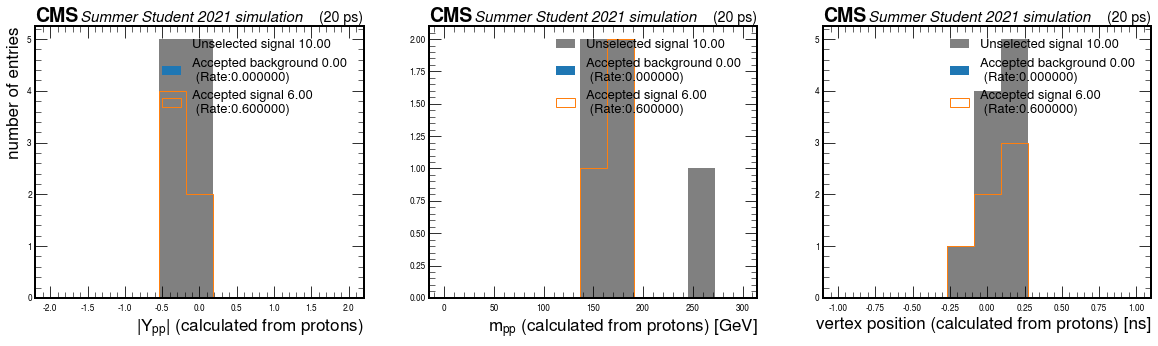

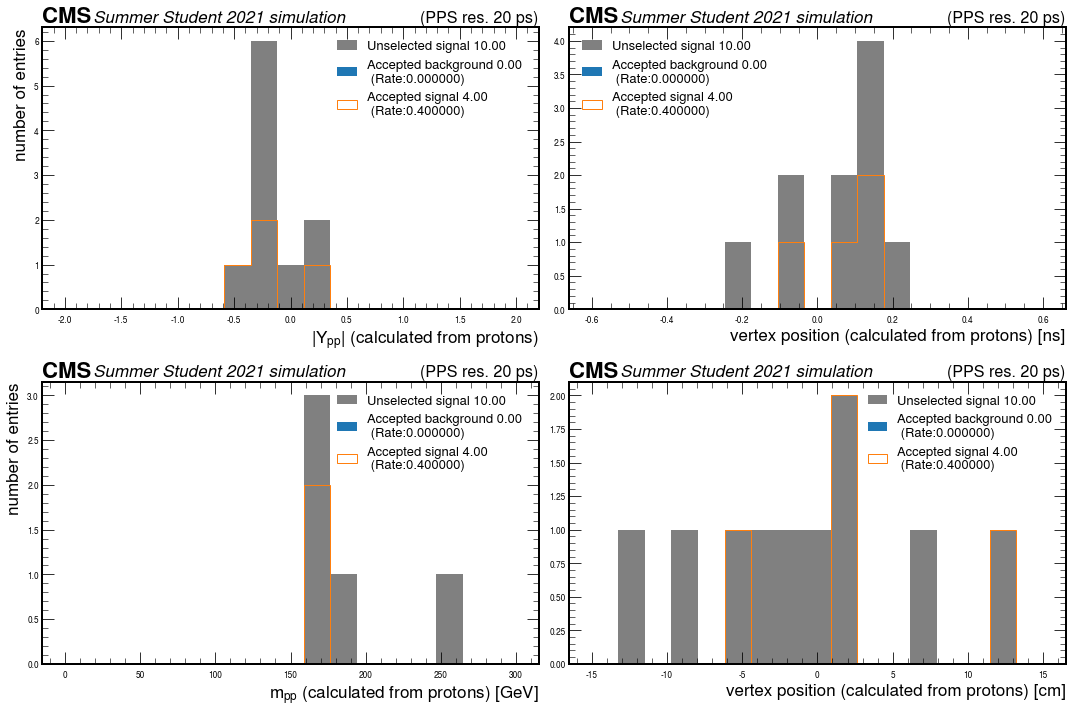

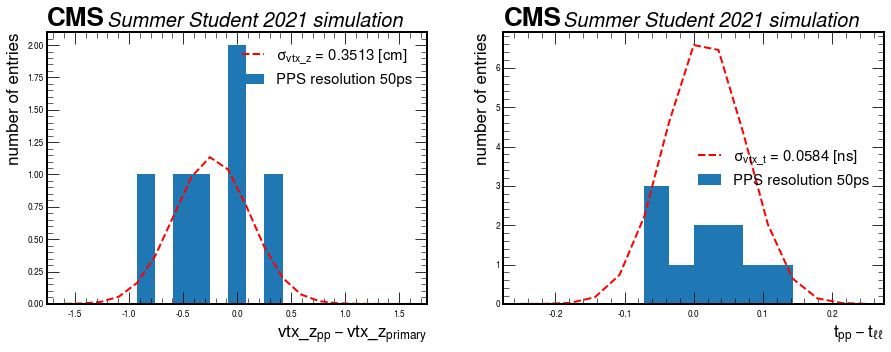

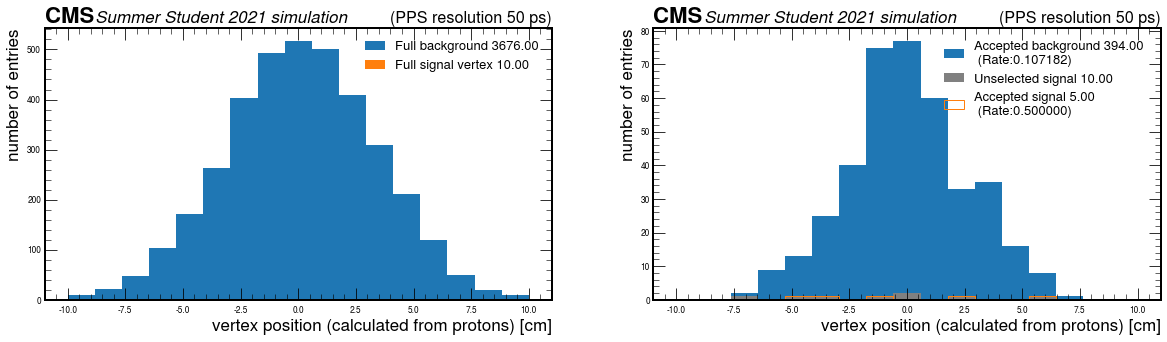

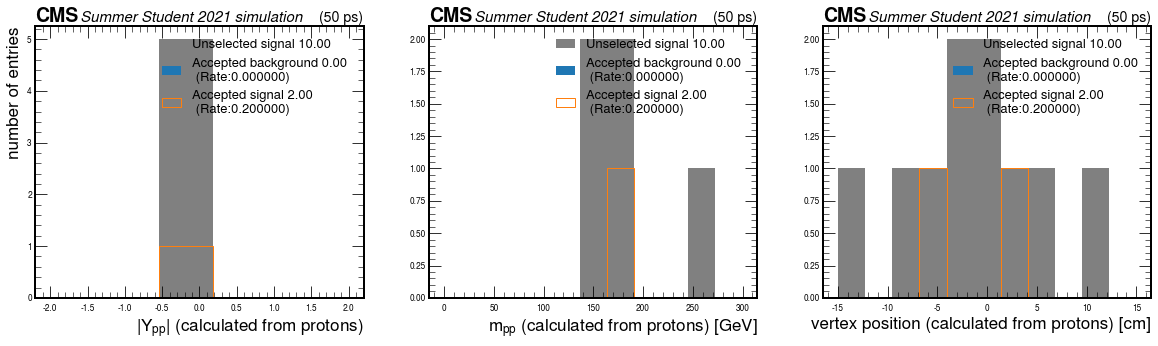

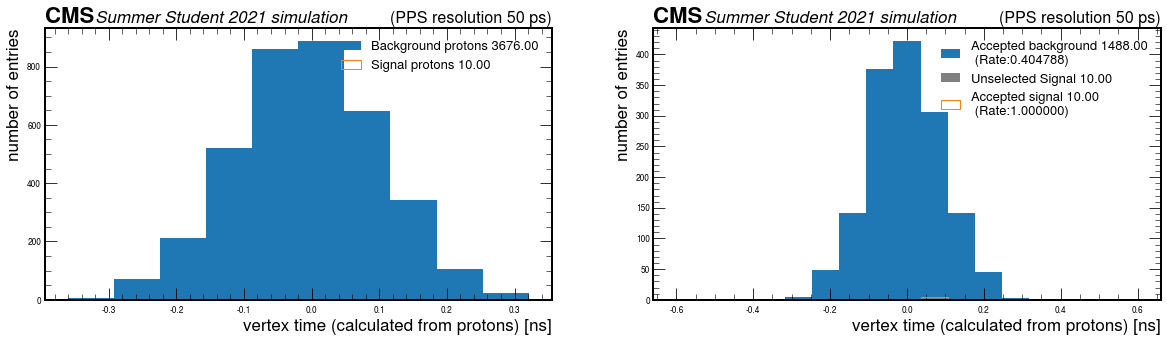

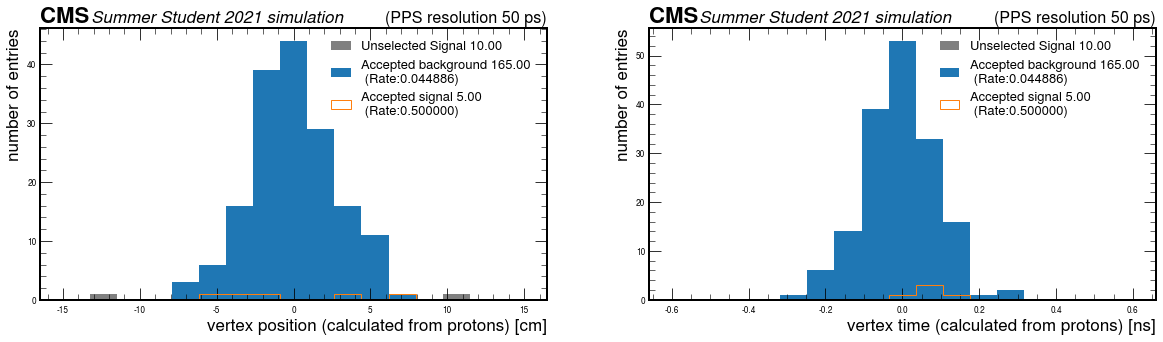

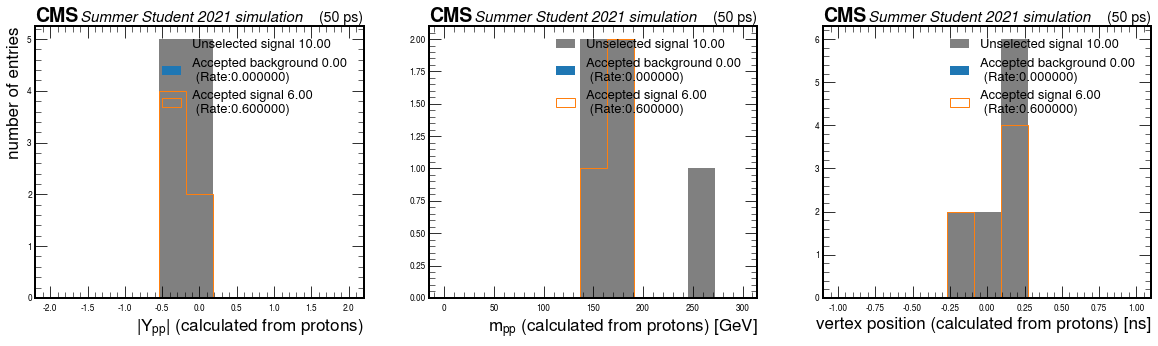

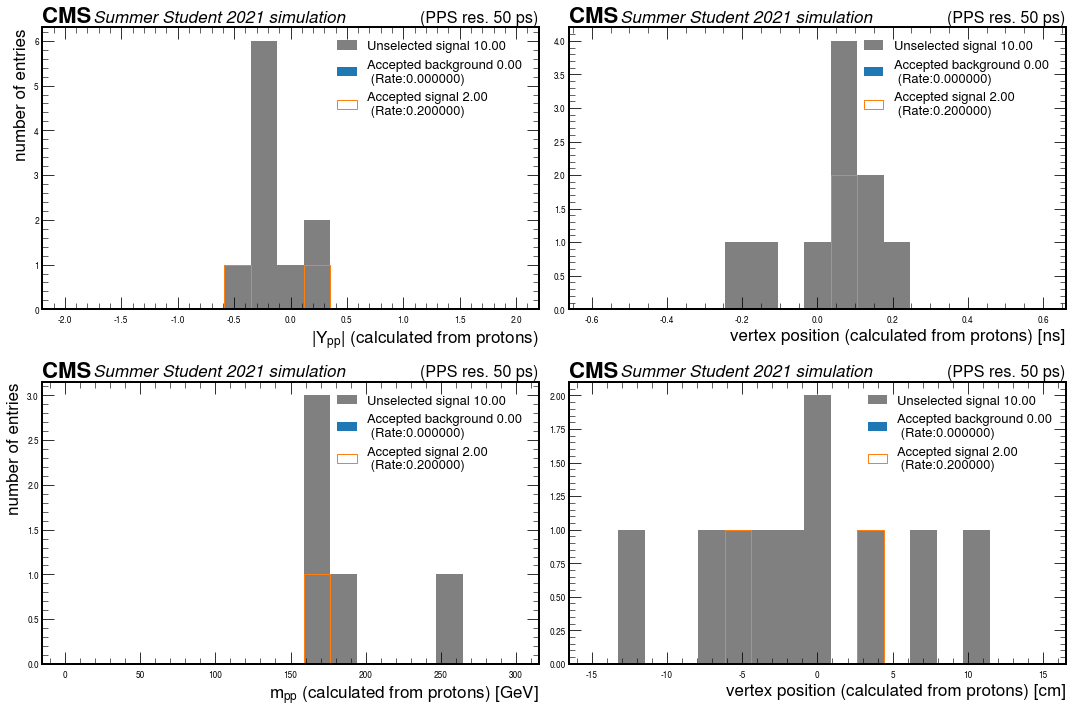

In [8]:
#Fit mass and rapidity
data = (sig['mpp'].values/sig['mll'].values)-1
data = data[ abs(data) < 0.06]
new_data = (sig['ypp'].values - sig['yll'].values)/sig['yll'].values
new_data = new_data[~np.isnan(new_data) &(abs(new_data) < 0.1) ]
sigma_m, sigma_y = doubleFitMassY(data, new_data,np.linspace(-0.06,0.06,18),np.linspace(-0.1,0.1,18),r'$ \frac{mpp - m\ell\ell}{m\ell\ell}$',r'$\frac{Ypp - Y\ell \ell}{Y\ell \ell}$','final/fit_mass_y.png' )
#Data from mass and rapidity
data_mb = abs(bg['mpp']-bg['mll']) 
data_yb = abs(bg['ypp']-bg['yll'])
data_ms = abs(sig['mpp'] - sig['mll'])
data_ys = abs(sig['ypp'] - sig['yll'])
histselectionMass(sigma_m, data_mb, data_ms)
histselectionY(sigma_y, data_yb, data_ys)
histselectionMassY(sigma_m,sigma_y,data_mb, data_ms,data_yb, data_ys)
#All selections
resolution = [20, 50]
for res in resolution:
    sigma_vz, sigma_t = doubleFitVertex(res)
    #Data for vertex position
    b_p1_t = bg['pr1_'+str(res)+'_t']
    b_p2_t = bg['pr2_'+str(res)+'_t'] 
    b_pp_vz = - (b_p1_t - b_p2_t)*c/2 
    b_mu = (bg['mu1_vz'] + bg['mu2_vz'])/2 
    data_bz = abs(b_pp_vz - bg['pr_vtx_z'].values)
    p1_t = sig['pr1_'+str(res)+'_t']
    p2_t = sig['pr2_'+str(res)+'_t'] 
    s_pp_vz = - (p1_t - p2_t)*c/2 
    data_sz = abs(s_pp_vz - sig['pr_vtx_z'])
    #Data for vertex time
    b_tmu = (bg['mu1_t'].values +bg['mu2_t'].values)/2 
    b_p1_t = bg['pr1_'+str(res)+'_t'].values
    b_p2_t = bg['pr2_'+str(res)+'_t'].values
    b_tpp = (( b_p1_t + b_p2_t) - 2*zpps/c)/2
    data_bt = abs(b_tpp - b_tmu)
    p1_t = sig['pr1_'+str(res)+'_t'].values
    p2_t = sig['pr2_'+str(res)+'_t'].values
    s_tpp =(( p1_t + p2_t) - 2*zpps/c)/2
    s_tmu = ( sig['mu1_t'].values + sig['mu2_t'].values)/2
    data_st = abs(s_tpp - s_tmu)
    #Making all the plots
    histselectionVtxZ(sigma_vz, res,data_bz, data_sz, b_pp_vz, s_pp_vz)
    histselectionKinVtxZ(sigma_vz, sigma_m, sigma_y, res, data_bz, data_sz, b_pp_vz, s_pp_vz,data_mb, data_ms,data_yb, data_ys)
    histselectionT(sigma_t, res, data_bt, data_st, b_tpp, s_tpp, b_tmu, s_tmu)
    histselectionVtxT(sigma_vz, sigma_t, data_bz, data_bt, data_sz, data_st, b_pp_vz, s_pp_vz, b_tpp, s_tpp, res,data_mb, data_ms,data_yb, data_ys)
    histselectionKinT(sigma_m, sigma_y, sigma_t, data_bt, data_st,  b_tpp, s_tpp, res,data_mb, data_ms,data_yb, data_ys)
    histFullselection(sigma_m, sigma_y, sigma_t, sigma_vz, data_bt, data_st, data_bz, data_sz, b_pp_vz, s_pp_vz, b_tpp, s_tpp, res,data_mb, data_ms,data_yb, data_ys)

# Yei :)